In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats  import ttest_ind
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv('C:/Debasish/personal/DS_city/Decodr_/Dataset/telecom_churn/historical_data.csv')

In [3]:
df.head()

phone number international plan voice mail plan  number vmail messages  \
0     382-4657                 no             yes                     25   
1     371-7191                 no             yes                     26   
2     358-1921                 no              no                      0   
3     375-9999                yes              no                      0   
4     330-6626                yes              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

In [7]:
df.tail()

phone number international plan voice mail plan  number vmail messages  \
2994     344-1362                 no              no                      0   
2995     419-3937                 no             yes                     31   
2996     348-4961                 no             yes                     34   
2997     329-1410                 no             yes                     30   
2998     332-9896                 no              no                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
2994              227.9              130             38.74              302.6   
2995              194.9               63             33.13              191.6   
2996               44.9               63              7.63              134.2   
2997              262.8              114             44.68              215.8   
2998              211.2               70             35.90              252.7   

      total eve calls  total eve charge  total night minutes  \
2994               71             25.72                191.5   
2995               90             16.29                153.0   
2996               82             11.41                168.4   
2997              130             18.34                154.8   
2998              122             21.48                225.8   

      total night calls  total night charge  total intl minutes  \
2994                 82                8.62                 5.5   
2995                129                6.89                13.2   
2996                118                7.58                13.3   
2997                 88                6.97                 7.8   
2998                104               10.16                12.3   

      total intl calls  total intl charge  customer service calls  churn  
2994                 7               1.49                       1   True  
2995                 2               3.56                       2  False  
2996                 3               3.59                       1  False  
2997                 2               2.11                       0  False  
2998                 3               3.32                       0  False

In [8]:
df.shape

(2999, 18)

In [ ]:
# Data contains 2999 Observations and 18 features including Output 

In [9]:
df.columns

Index(['phone number', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [257]:
df.dtypes.value_counts()

float64    8
int64      6
object     3
bool       1
dtype: int64

In [ ]:
# So in our data 6 int,8 float, 3 object type and 1 bool variable is present 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 18 columns):
phone number              2999 non-null object
international plan        2999 non-null object
voice mail plan           2999 non-null object
number vmail messages     2999 non-null int64
total day minutes         2999 non-null float64
total day calls           2999 non-null int64
total day charge          2999 non-null float64
total eve minutes         2999 non-null float64
total eve calls           2999 non-null int64
total eve charge          2999 non-null float64
total night minutes       2999 non-null float64
total night calls         2999 non-null int64
total night charge        2999 non-null float64
total intl minutes        2999 non-null float64
total intl calls          2999 non-null int64
total intl charge         2999 non-null float64
customer service calls    2999 non-null int64
churn                     2999 non-null bool
dtypes: bool(1), float64(8), int64(6), object(3

In [ ]:
#Data Contains no missing Values.So no imputataion will be required

In [258]:
df.describe(include='all').T

count unique       top  freq     mean       std   min  \
phone number            2999   2999  376-4540     1      NaN       NaN   NaN   
international plan      2999      2        no  2703      NaN       NaN   NaN   
voice mail plan         2999      2        no  2171      NaN       NaN   NaN   
number vmail messages   2999    NaN       NaN   NaN  8.06402   13.6541     0   
total day minutes       2999    NaN       NaN   NaN  179.901   54.6014     0   
total day calls         2999    NaN       NaN   NaN  100.399   20.1513     0   
total day charge        2999    NaN       NaN   NaN  30.5838    9.2822     0   
total eve minutes       2999    NaN       NaN   NaN  201.124   50.9938     0   
total eve calls         2999    NaN       NaN   NaN  100.003   19.8813     0   
total eve charge        2999    NaN       NaN   NaN  17.0958   4.33445     0   
total night minutes     2999    NaN       NaN   NaN  200.781   50.5218  23.2   
total night calls       2999    NaN       NaN   NaN   100.01   19.5668    33   
total night charge      2999    NaN       NaN   NaN  9.03523   2.27353  1.04   
total intl minutes      2999    NaN       NaN   NaN  10.2285   2.78319     0   
total intl calls        2999    NaN       NaN   NaN  4.46949   2.44533     0   
total intl charge       2999    NaN       NaN   NaN   2.7622  0.751444     0   
customer service calls  2999    NaN       NaN   NaN  1.54952   1.30841     0   
churn                   2999      2     False  2563      NaN       NaN   NaN   

                           25%    50%     75%    max  
phone number               NaN    NaN     NaN    NaN  
international plan         NaN    NaN     NaN    NaN  
voice mail plan            NaN    NaN     NaN    NaN  
number vmail messages        0      0      19     51  
total day minutes       144.05  179.4  216.25  350.8  
total day calls             87    101     114    165  
total day charge         24.49   30.5   36.76  59.64  
total eve minutes        166.7  201.6   235.9  363.7  
total eve calls             87    100     113    168  
total eve charge         14.17  17.14   20.05  30.91  
total night minutes      167.1  201.1  235.15    395  
total night calls           87    100     113    175  
total night charge        7.52   9.05   10.58  17.77  
total intl minutes         8.5   10.3    12.1     20  
total intl calls             3      4       6     19  
total intl charge          2.3   2.78    3.27    5.4  
customer service calls       1      1       2      9  
churn                      NaN    NaN     NaN    NaN

In [ ]:
#Inference:
1. 2 International plan exist.
2. 2 voice mail plan exist
3. Output churn has 2 labels.

Lets look at the variables with

## Univaritate Analysis:

In [18]:
df.select_dtypes(include='object').columns

Index(['phone number', 'international plan', 'voice mail plan'], dtype='object')

In [25]:
df.select_dtypes(include=['Int64','float64']).columns

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

In [ ]:
#For Output Variable:

'churn'

In [27]:
df['churn']

0       False
1       False
2       False
3       False
4       False
        ...  
2994     True
2995    False
2996    False
2997    False
2998    False
Name: churn, Length: 2999, dtype: bool

In [259]:
df['churn'].describe()

count      2999
unique        2
top       False
freq       2563
Name: churn, dtype: object

       Label_count  Label_Percentage
False         2563          0.854618
True           436          0.145382


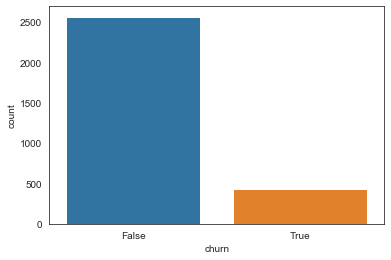

In [273]:
x={'Label_count':df['churn'].value_counts(),'Label_Percentage':df['churn'].value_counts(normalize=True)}
print(pd.DataFrame(x))

sns.countplot('churn',data=df)
plt.show()

In [ ]:
So my Output variable has 2 lables, True and False where presence of False is 85% and True is only 14.5%.
So one thing is clear that data is highly biased towards False.

In [ ]:
#Input Variable:

In [ ]:
#number vmail messages

In [36]:
df['number vmail messages'].describe()

count    2999.000000
mean        8.064021
std        13.654140
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max        51.000000
Name: number vmail messages, dtype: float64

In [37]:
df['total day minutes'].describe()

count    2999.000000
mean      179.901400
std        54.601378
min         0.000000
25%       144.050000
50%       179.400000
75%       216.250000
max       350.800000
Name: total day minutes, dtype: float64

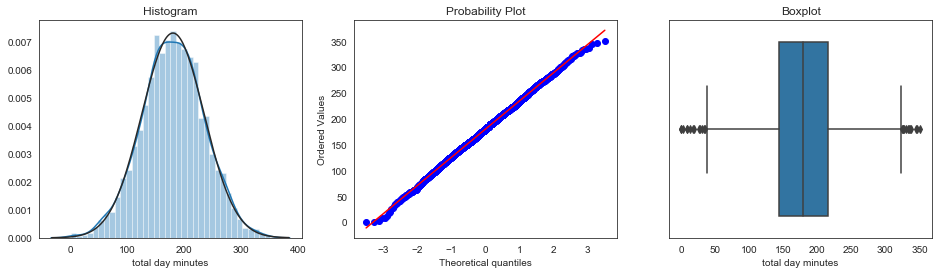

In [38]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.set_style('white')
sns.distplot(df['total day minutes'],fit=norm)
plt.title('Histogram')
plt.subplot(1,3,2)
stats.probplot(df['total day minutes'],dist='norm',plot=plt)
plt.subplot(1,3,3)
sns.boxplot(df['total day minutes'])
plt.title('Boxplot')
plt.show()

In [ ]:
'total day minutes' Follows normal distribution.

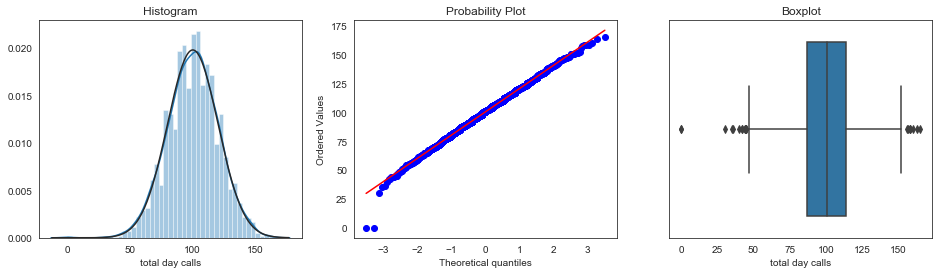

In [39]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.set_style('white')
sns.distplot(df['total day calls'],fit=norm)
plt.title('Histogram')
plt.subplot(1,3,2)
stats.probplot(df['total day calls'],dist='norm',plot=plt)
plt.subplot(1,3,3)
sns.boxplot(df['total day calls'])
plt.title('Boxplot')
plt.show()

In [ ]:
'total day calls' Follows normal distribution.

In [ ]:
total day charge

In [ ]:
df['total day charge'].describe()

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.set_style('white')
sns.distplot(df['total day charge'],fit=norm)
plt.title('Histogram')
plt.subplot(1,3,2)
stats.probplot(df['total day charge'],dist='norm',plot=plt)
plt.subplot(1,3,3)
sns.boxplot(df['total day charge'])
plt.title('Boxplot')
plt.show()

### Function to to plot Histogram, Q_Q Plot and Boxplot side by side for a variable:

In [97]:
def univariate(df,variable):
    
 
    
    print("Variable Name:'{}'".format(variable))
    print('')
    print('Statistical Description:')
    print('------------------------')
    print(df[variable].describe())
    print('*'*50)
    print('')
    print('Graphical Presentation:')
    
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.set_style('white')
    sns.distplot(df[variable],fit=norm)
    plt.title('Histogram')
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.subplot(1,3,3)
    sns.boxplot(df[variable])
    plt.title('Boxplot')
    plt.show()
    print('='*60)
    print('\n')
    return
    
    
    


In [67]:
df_num=df.select_dtypes(include=['Int64','float64']).columns

In [68]:
df_num

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

Variable Name:'number vmail messages'

Statistical Description:
------------------------
count    2999.000000
mean        8.064021
std        13.654140
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max        51.000000
Name: number vmail messages, dtype: float64
**************************************************

Graphical Presentation:


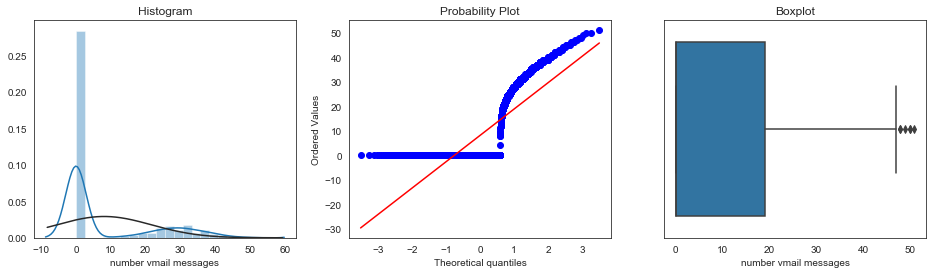



Variable Name:'total day minutes'

Statistical Description:
------------------------
count    2999.000000
mean      179.901400
std        54.601378
min         0.000000
25%       144.050000
50%       179.400000
75%       216.250000
max       350.800000
Name: total day minutes, dtype: float64
**************************************************

Graphical Presentation:


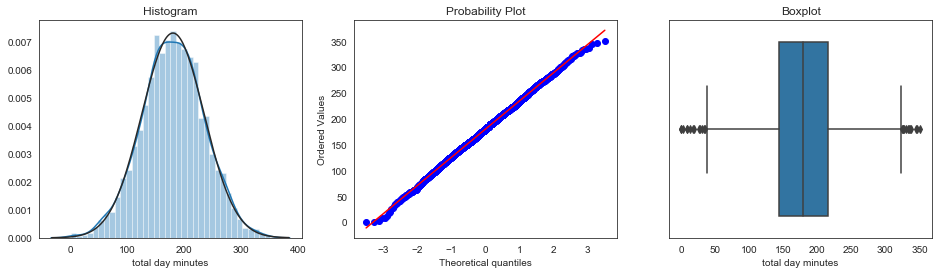



Variable Name:'total day calls'

Statistical Description:
------------------------
count    2999.000000
mean      100.399133
std        20.151306
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64
**************************************************

Graphical Presentation:


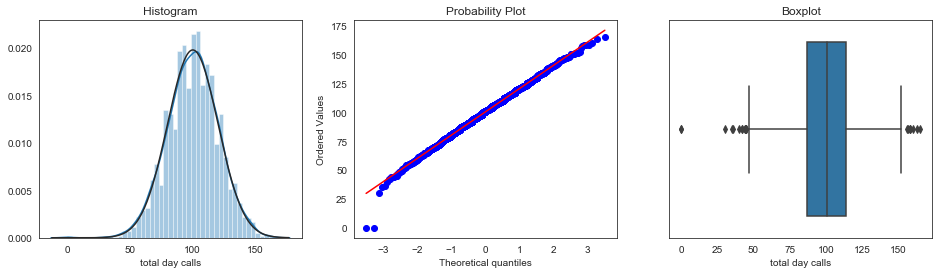



Variable Name:'total day charge'

Statistical Description:
------------------------
count    2999.000000
mean       30.583781
std         9.282202
min         0.000000
25%        24.490000
50%        30.500000
75%        36.760000
max        59.640000
Name: total day charge, dtype: float64
**************************************************

Graphical Presentation:


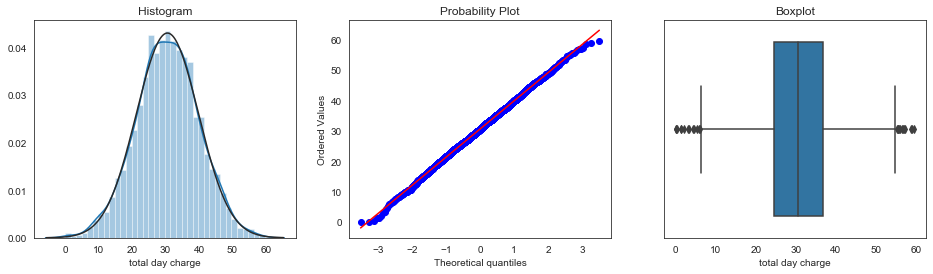



Variable Name:'total eve minutes'

Statistical Description:
------------------------
count    2999.000000
mean      201.124375
std        50.993758
min         0.000000
25%       166.700000
50%       201.600000
75%       235.900000
max       363.700000
Name: total eve minutes, dtype: float64
**************************************************

Graphical Presentation:


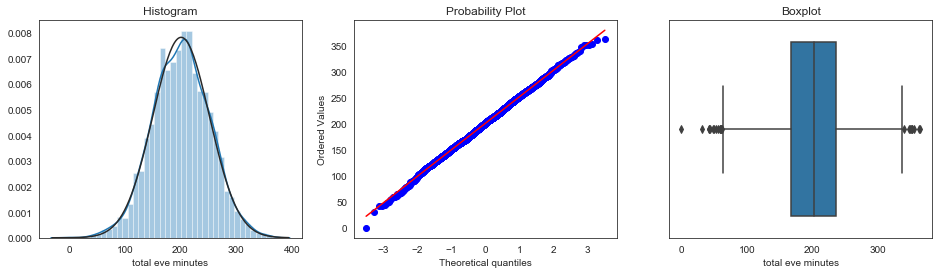



Variable Name:'total eve calls'

Statistical Description:
------------------------
count    2999.000000
mean      100.003001
std        19.881294
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       168.000000
Name: total eve calls, dtype: float64
**************************************************

Graphical Presentation:


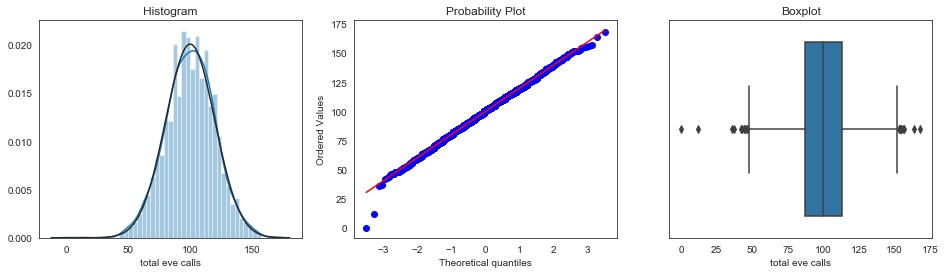



Variable Name:'total eve charge'

Statistical Description:
------------------------
count    2999.000000
mean       17.095755
std         4.334447
min         0.000000
25%        14.170000
50%        17.140000
75%        20.050000
max        30.910000
Name: total eve charge, dtype: float64
**************************************************

Graphical Presentation:


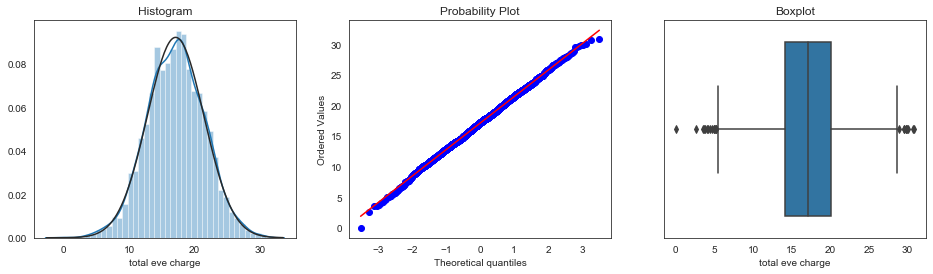



Variable Name:'total night minutes'

Statistical Description:
------------------------
count    2999.000000
mean      200.781060
std        50.521821
min        23.200000
25%       167.100000
50%       201.100000
75%       235.150000
max       395.000000
Name: total night minutes, dtype: float64
**************************************************

Graphical Presentation:


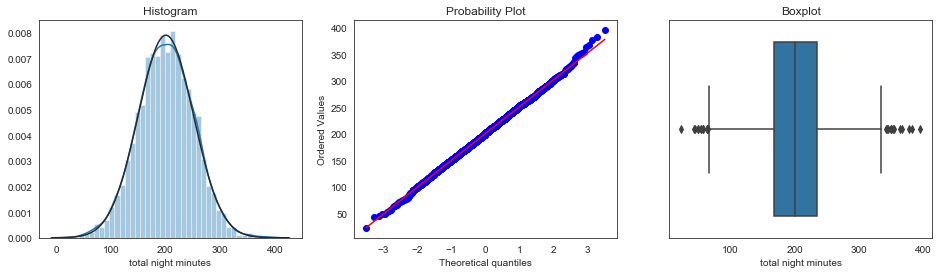



Variable Name:'total night calls'

Statistical Description:
------------------------
count    2999.000000
mean      100.010003
std        19.566770
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total night calls, dtype: float64
**************************************************

Graphical Presentation:


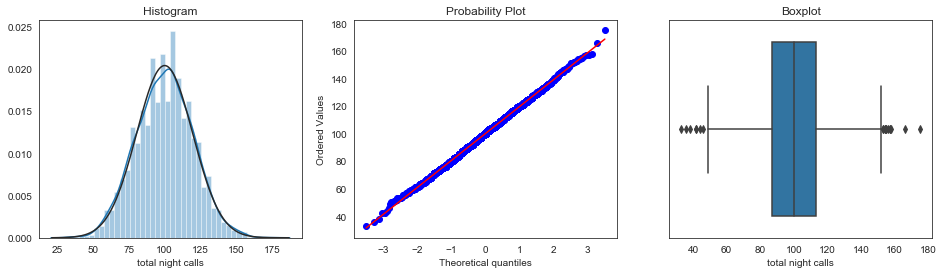



Variable Name:'total night charge'

Statistical Description:
------------------------
count    2999.000000
mean        9.035228
std         2.273533
min         1.040000
25%         7.520000
50%         9.050000
75%        10.580000
max        17.770000
Name: total night charge, dtype: float64
**************************************************

Graphical Presentation:


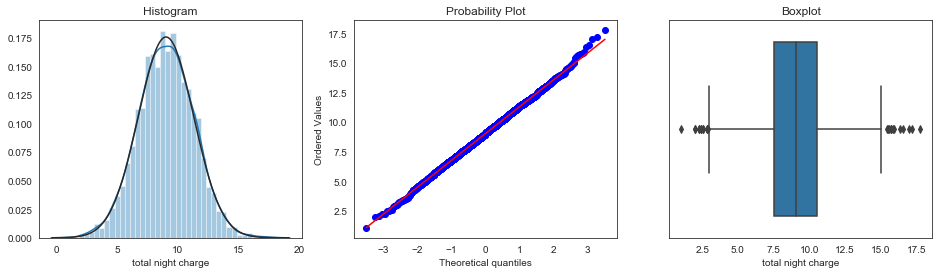



Variable Name:'total intl minutes'

Statistical Description:
------------------------
count    2999.000000
mean       10.228543
std         2.783191
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: total intl minutes, dtype: float64
**************************************************

Graphical Presentation:


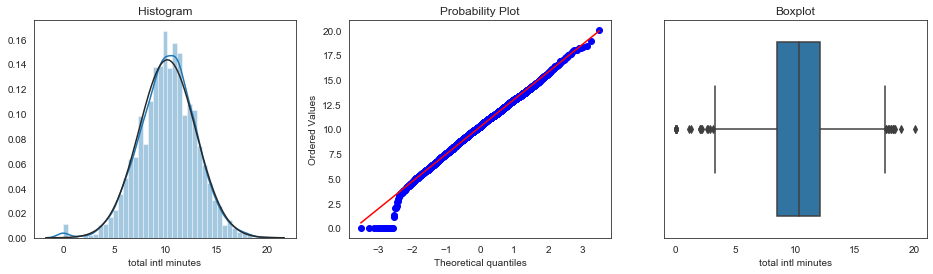



Variable Name:'total intl calls'

Statistical Description:
------------------------
count    2999.00000
mean        4.46949
std         2.44533
min         0.00000
25%         3.00000
50%         4.00000
75%         6.00000
max        19.00000
Name: total intl calls, dtype: float64
**************************************************

Graphical Presentation:


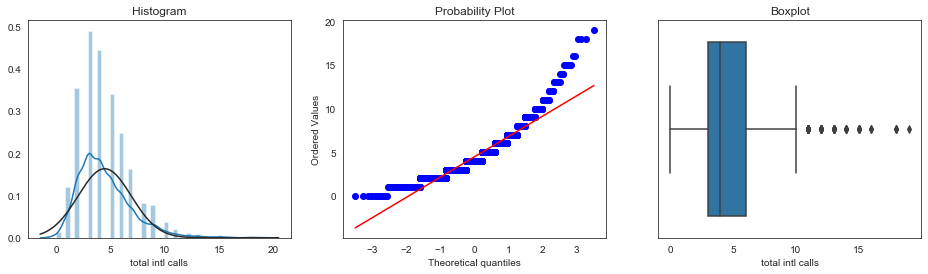



Variable Name:'total intl charge'

Statistical Description:
------------------------
count    2999.000000
mean        2.762204
std         0.751444
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: total intl charge, dtype: float64
**************************************************

Graphical Presentation:


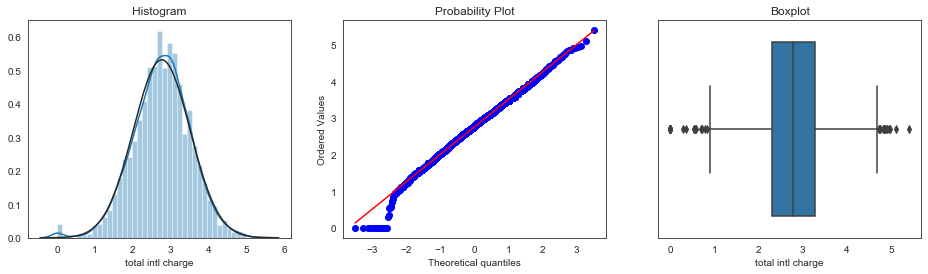



Variable Name:'customer service calls'

Statistical Description:
------------------------
count    2999.000000
mean        1.549517
std         1.308411
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64
**************************************************

Graphical Presentation:


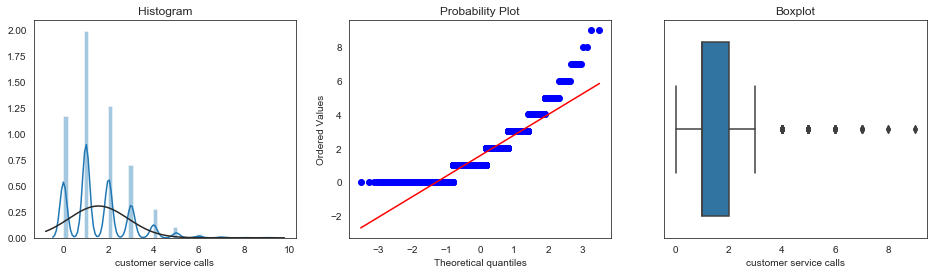

In [99]:
for i in df_num:
    univariate(df,i)

In [ ]:
1. 'total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total night calls','total night charge','total intl minutes','total intl calls' Follows normal distribution.
2. 'customer service calls' is seems like discrete values. 

In [ ]:
#Categorical Variables:

In [102]:
df_cat=df.select_dtypes(include='object').columns

In [103]:
df_cat

Index(['phone number', 'international plan', 'voice mail plan'], dtype='object')

In [106]:
def univar_cat(df,variable):
    x={'Count':df[variable].value_counts(),'Percentage':df[variable].value_counts(normalize=True)}
    print(pd.DataFrame(x))

In [107]:
for i in df_cat:
    univar_cat(df,i)

          Count  Percentage
376-4540      1    0.000333
412-8769      1    0.000333
412-4185      1    0.000333
415-2285      1    0.000333
361-9621      1    0.000333
...         ...         ...
358-7914      1    0.000333
398-8801      1    0.000333
328-9869      1    0.000333
348-1592      1    0.000333
392-3315      1    0.000333

[2999 rows x 2 columns]
     Count  Percentage
no    2703      0.9013
yes    296      0.0987
     Count  Percentage
no    2171    0.723908
yes    828    0.276092


In [108]:
df['phone number']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
2994    344-1362
2995    419-3937
2996    348-4961
2997    329-1410
2998    332-9896
Name: phone number, Length: 2999, dtype: object

In [112]:
df['international plan'].value_counts()

no     2703
yes     296
Name: international plan, dtype: int64

In [111]:
x={'Count':df['international plan'].value_counts(),'Percentage':df['international plan'].value_counts(normalize=True)}
print(pd.DataFrame(x))



     Count  Percentage
no    2703      0.9013
yes    296      0.0987


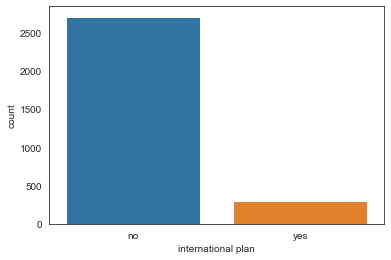

In [115]:
sns.countplot(df['international plan'])

==> Only 9% of the customer has opted for international plan and rest don't have


In [113]:
x={'Count':df['voice mail plan'].value_counts(),'Percentage':df['voice mail plan'].value_counts(normalize=True)}
print(pd.DataFrame(x))

     Count  Percentage
no    2171    0.723908
yes    828    0.276092


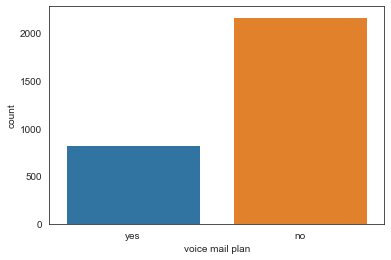

In [116]:
sns.countplot(df['voice mail plan'])

==> Only 27% of the customer has opted for Voice mail plan and rest don't have

## Bi-variate Analysis:

In [114]:
## Output Variable with Numeric Variable

Ttest_indResult(statistic=-11.464601208575843, pvalue=8.233070701991199e-30)
************************************************************


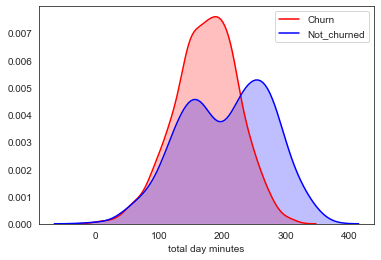

In [169]:

cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total day minutes'],cat2['total day minutes']))
print('*'*60)


#sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total day minutes').add_legend()

sns.kdeplot(cat1['total day minutes'],label='Churn',shade=True,color='r')
sns.kdeplot(cat2['total day minutes'],label='Not_churned',shade=True,color='b')
plt.xlabel('total day minutes')

plt.show()

In [ ]:
Peoples who talk more,approx more than 250 minutes per day are the one who mostly goes for churning out,they probably look for better plan of long talktime.

Ttest_indResult(statistic=-0.6220122636245158, pvalue=0.5339811189713182)
************************************************************


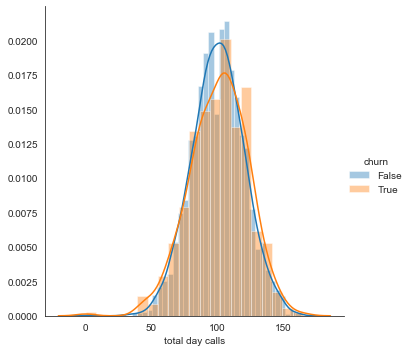

In [131]:
cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total day calls'],cat2['total day calls']))
print('*'*60)
sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total day calls').add_legend()
plt.show()

In [ ]:
Peoples who are the churners are one who make more no of day calls.

Ttest_indResult(statistic=-11.464464820923471, pvalue=8.245505023809855e-30)
************************************************************


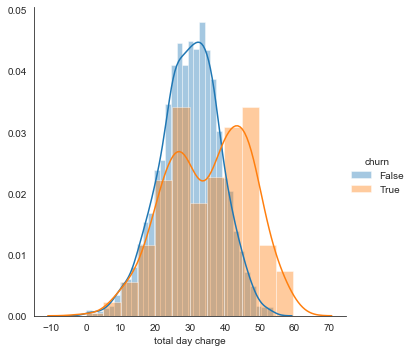

In [132]:
cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total day charge'],cat2['total day charge']))
print('*'*60)
sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total day charge').add_legend()
plt.show()

In [ ]:
Total day charges greater than 40 are those who likely to be the churners.

Ttest_indResult(statistic=-5.091906355729865, pvalue=3.764002644931494e-07)
************************************************************


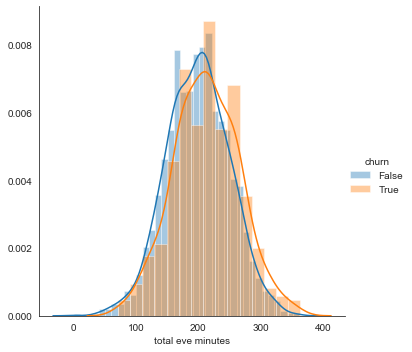

In [133]:
cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total eve minutes'],cat2['total eve minutes']))
print('*'*60)
sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total eve minutes').add_legend()
plt.show()

In [ ]:
people with total Eve minutes are likely to be churners

Ttest_indResult(statistic=-0.9137752961013574, pvalue=0.360908434734977)
************************************************************


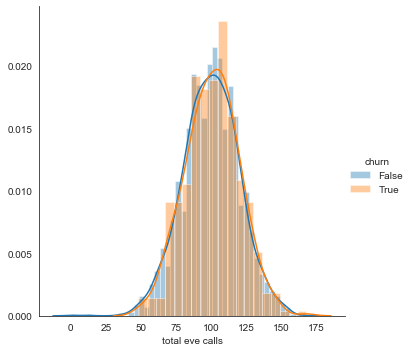

In [134]:
cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total eve calls'],cat2['total eve calls']))
print('*'*60)
sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total eve calls').add_legend()
plt.show()

In [117]:
df_num

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

Ttest_indResult(statistic=-5.091031374353683, pvalue=3.7812657304996597e-07)
************************************************************


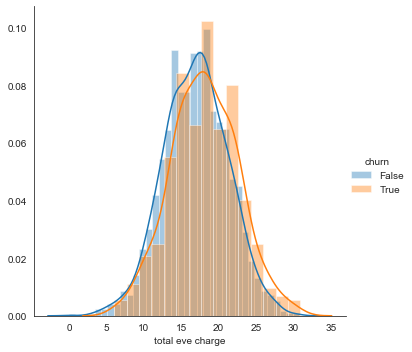

In [144]:
cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total eve charge'],cat2['total eve charge']))
print('*'*60)
sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total eve charge').add_legend()
plt.show()

Ttest_indResult(statistic=-1.9900017998957051, pvalue=0.046681451754517614)
************************************************************


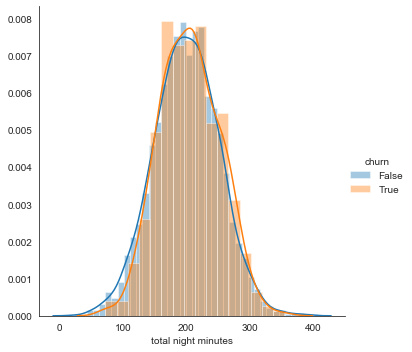

In [147]:
cat1=df[df['churn']==0]
cat2=df[df['churn']==1]

print(ttest_ind(cat1['total night minutes'],cat2['total night minutes']))
print('*'*60)
sns.FacetGrid(df,hue='churn',height=5,aspect=1).map(sns.distplot,'total night minutes').add_legend()

plt.show()

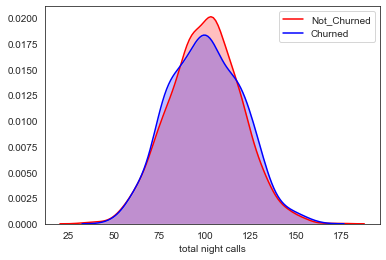

In [149]:
sns.kdeplot(cat1['total night calls'],label='Not_Churned',shade=True,color='r')
sns.kdeplot(cat2['total night calls'],label='Churned',shade=True,color='b')
plt.xlabel('total night calls')
plt.show()

In [ ]:
output Variable with Categorical Variable:

In [150]:
df_cat

Index(['phone number', 'international plan', 'voice mail plan'], dtype='object')

churn                  False     True 
international plan                    
no                  0.933671  0.711009
yes                 0.066329  0.288991
**************************************************
(2.067992759206444, 0.15041937892939178, 1, array([[0.82234033, 0.82234033],
       [0.17765967, 0.17765967]]))


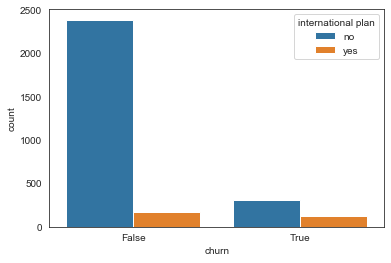

In [158]:
x=pd.crosstab(df['international plan'],df['churn'],normalize='columns')
print(x)
print('*'*50)
print(stats.chi2_contingency(x))

sns.countplot(x='churn',hue='international plan',data=df)

plt.show()

In [ ]:
people who have churned among them 28% have international plan.So there might be a possibility that churners look for better international plan.

churn               False     True 
voice mail plan                    
no               0.706204  0.827982
yes              0.293796  0.172018
**************************************************
(2.1584780749019696, 0.14178506220555379, 1, array([[0.76709266, 0.76709266],
       [0.23290734, 0.23290734]]))


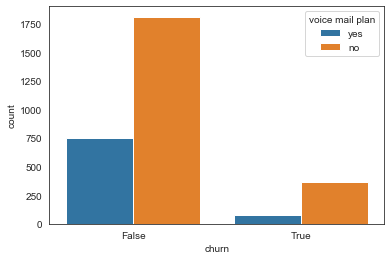

In [161]:
x=pd.crosstab(df['voice mail plan'],df['churn'],normalize='columns')
print(x)
print('*'*50)
print(stats.chi2_contingency(x))

sns.countplot(x='churn',hue='voice mail plan',data=df)
plt.show()

In [ ]:
among the churners less percentage of people have voice mail plan as compared to non-churners.

### Multi-Variate Analysis:
    

In [172]:
df.columns

Index(['phone number', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

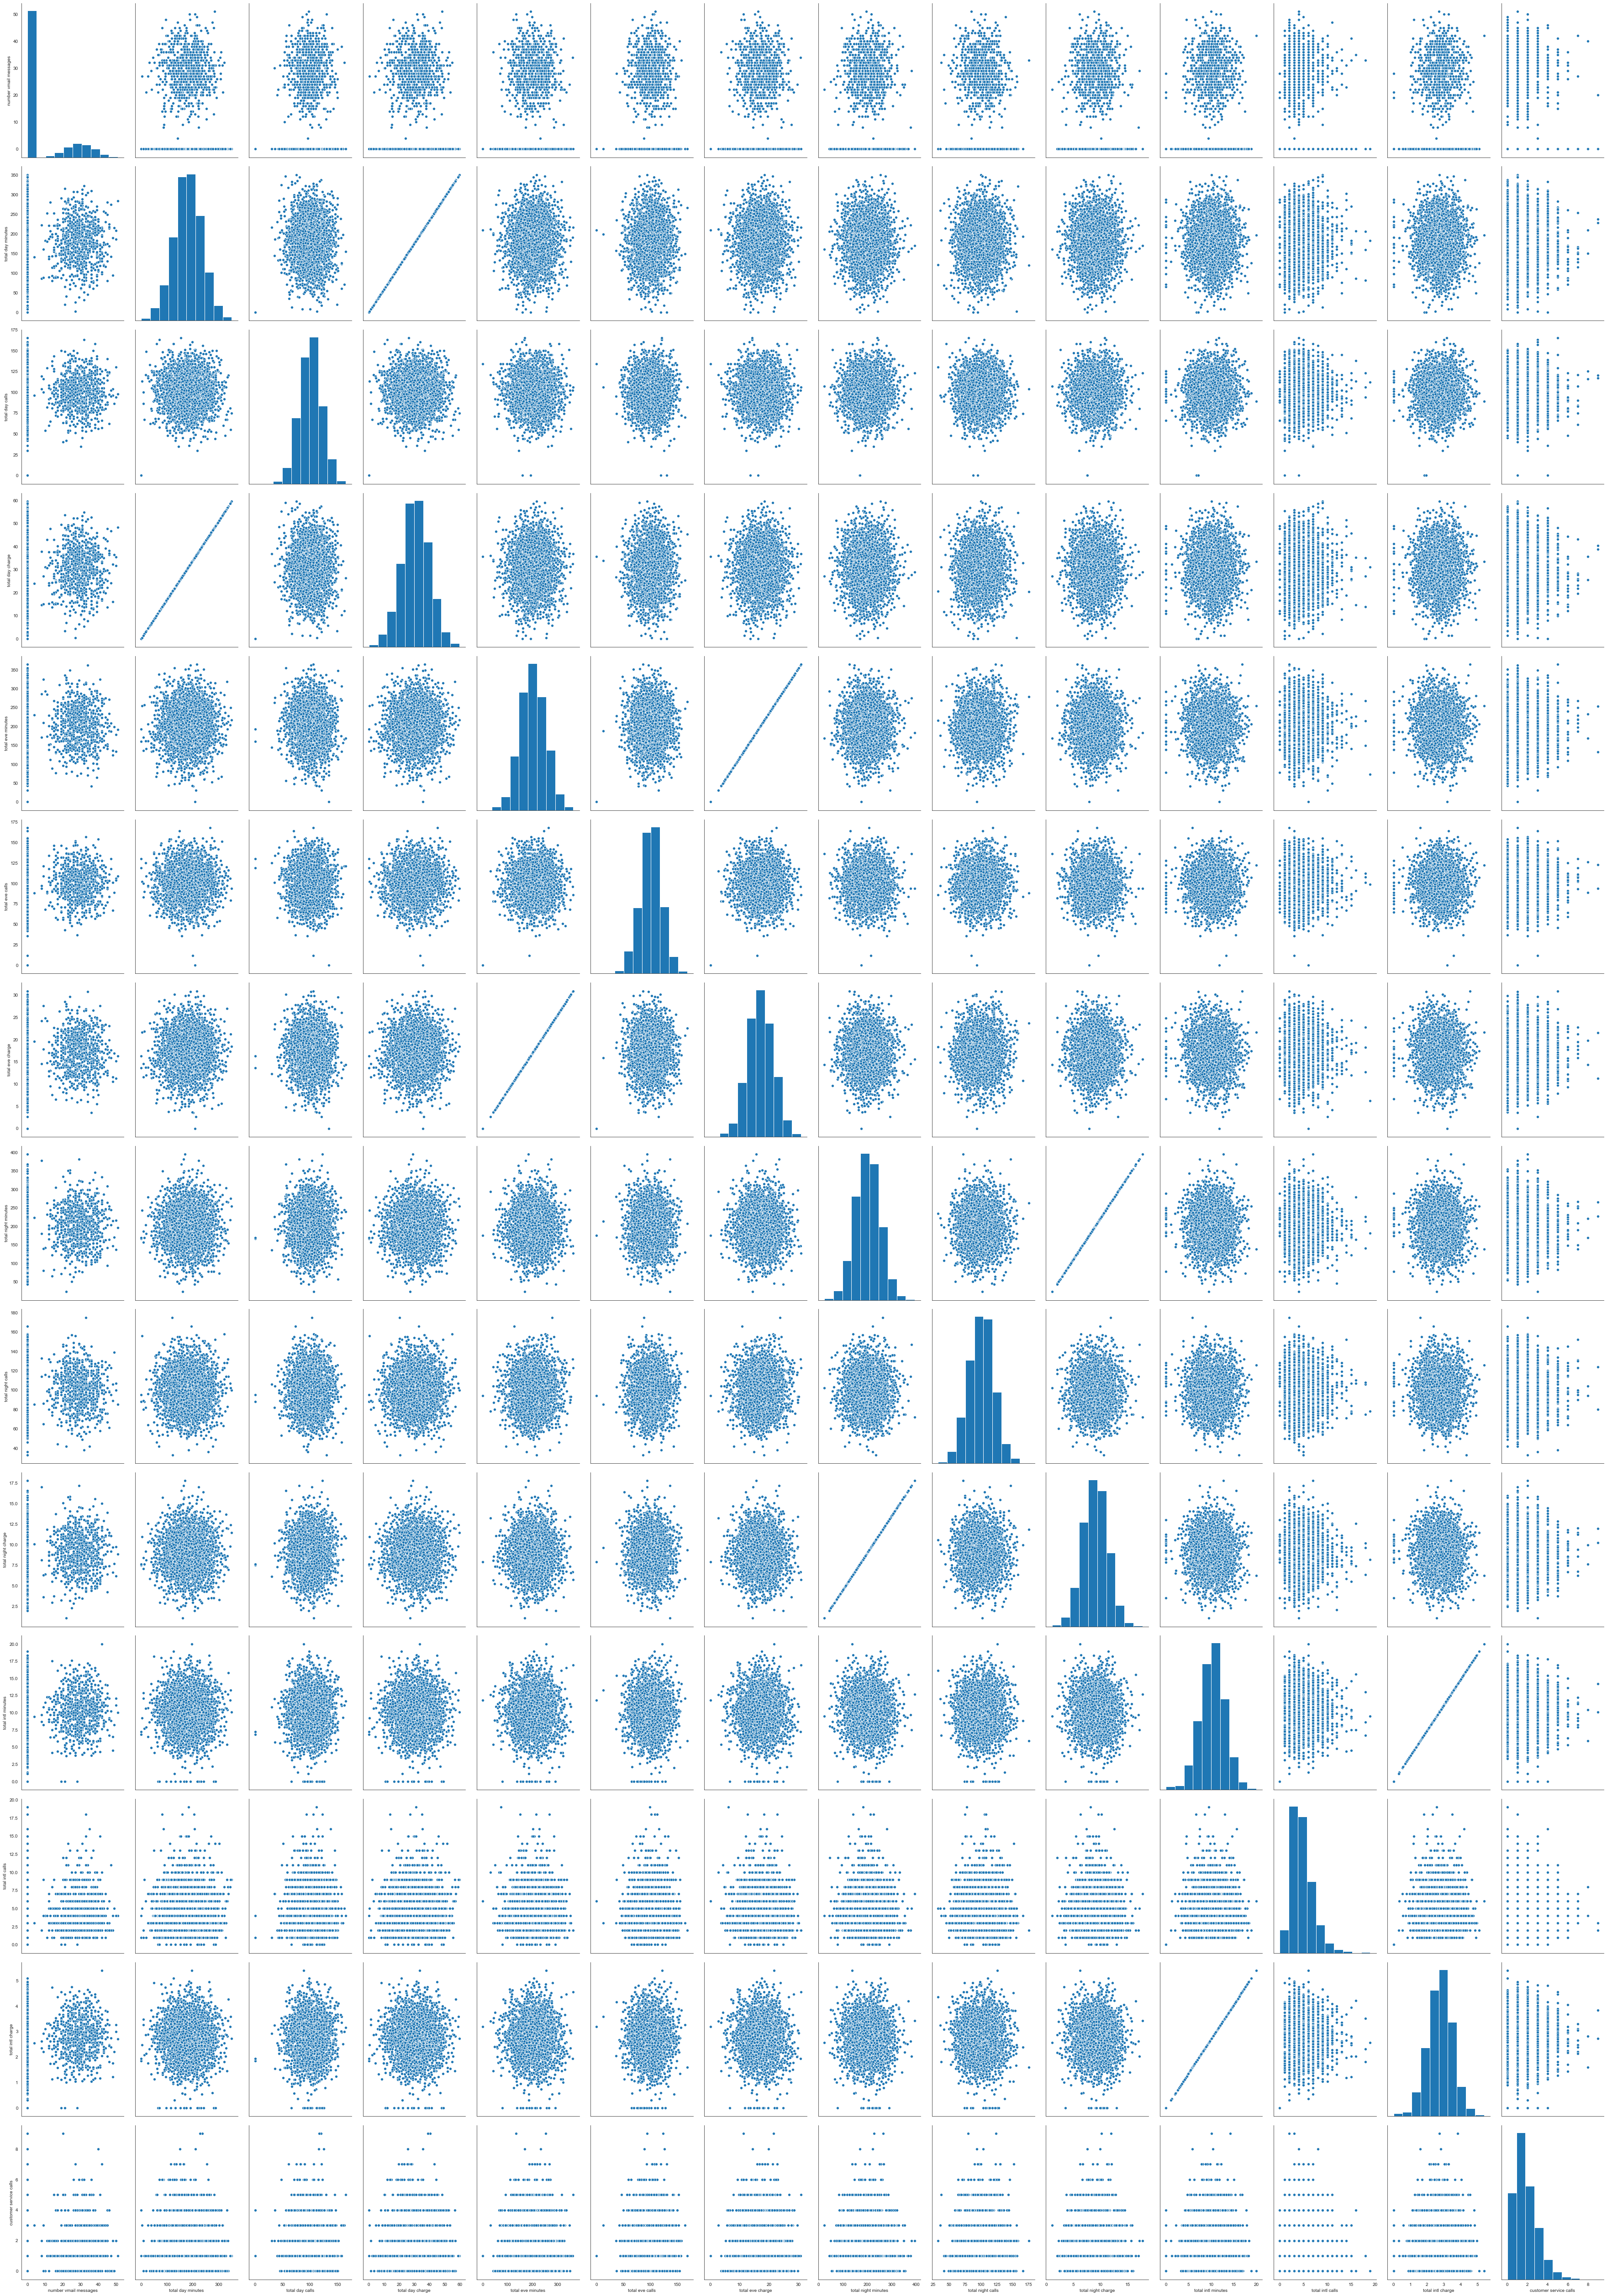

In [174]:
sns.pairplot(df,x_vars=df_num,y_vars=df_num,size=5,aspect=0.7,)
plt.show()

In [ ]:
Total day minute and total day charge are in linear relation
tolal eve minutes and total eve chanrge are 


<Figure size 360x360 with 0 Axes>

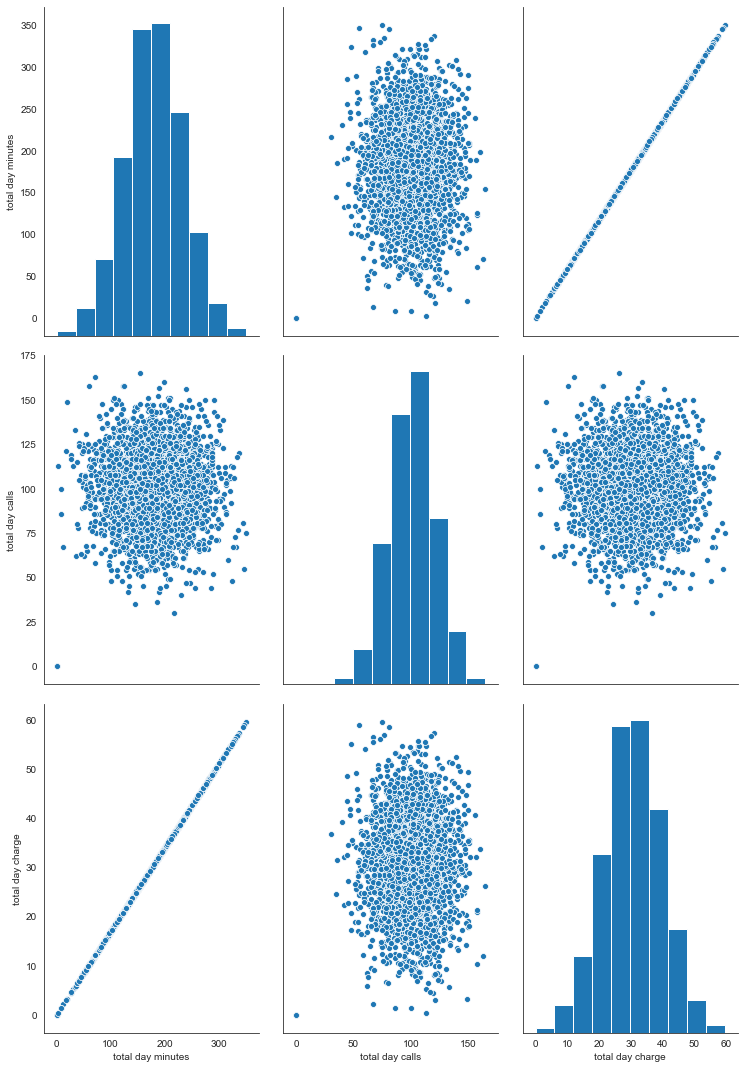

In [187]:
plt.figure(figsize=(5,5))
sns.pairplot(df,x_vars=['total day minutes','total day calls',
       'total day charge'],y_vars=['total day minutes','total day calls',
       'total day charge'],size=5,aspect=0.7)
plt.show()

In [ ]:
==> 'total day charge' and 'total day minutes' are in linear relation.

<Figure size 360x360 with 0 Axes>

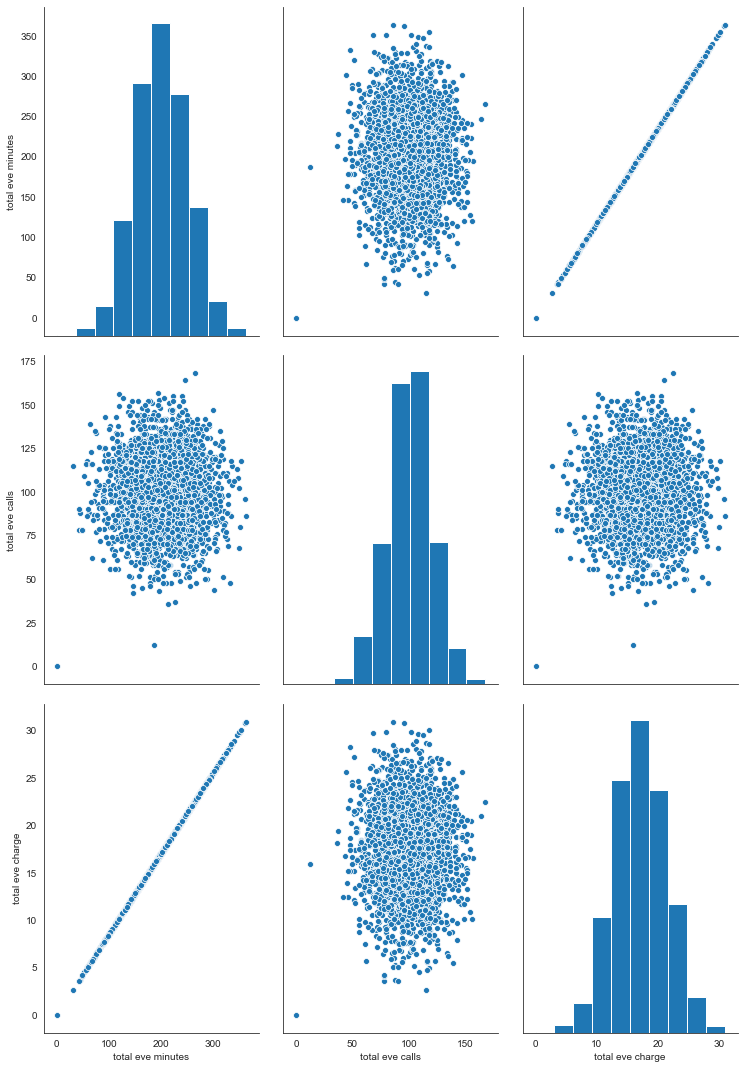

In [188]:
plt.figure(figsize=(5,5))
sns.pairplot(df,x_vars=['total eve minutes', 'total eve calls',
       'total eve charge'],y_vars=['total eve minutes', 'total eve calls',
       'total eve charge'],size=5,aspect=0.7)
plt.show()

In [ ]:
==> 'total eve charge' and 'total eve minutes' are in linear relation.

<Figure size 360x360 with 0 Axes>

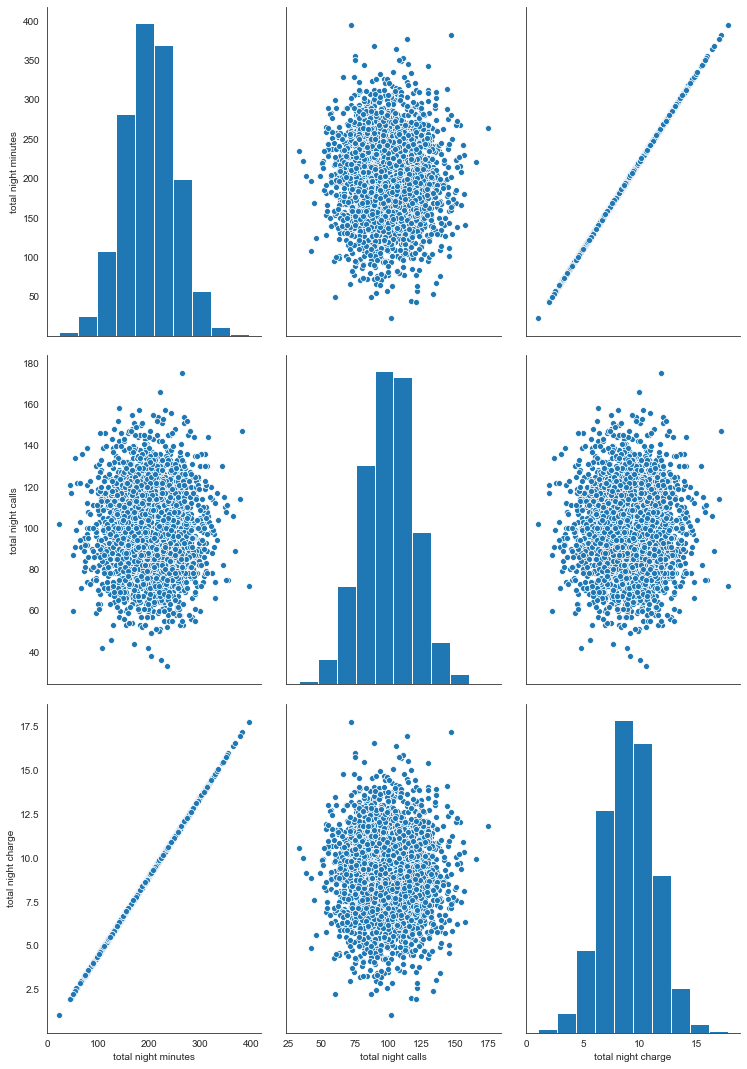

In [189]:
plt.figure(figsize=(5,5))
sns.pairplot(df,x_vars=['total night minutes', 'total night calls',
       'total night charge'],y_vars=['total night minutes', 'total night calls',
       'total night charge'],size=5,aspect=0.7)
plt.show()

In [ ]:
==>'total night charge' and 'total night minutes' are linerly associated.

<Figure size 360x360 with 0 Axes>

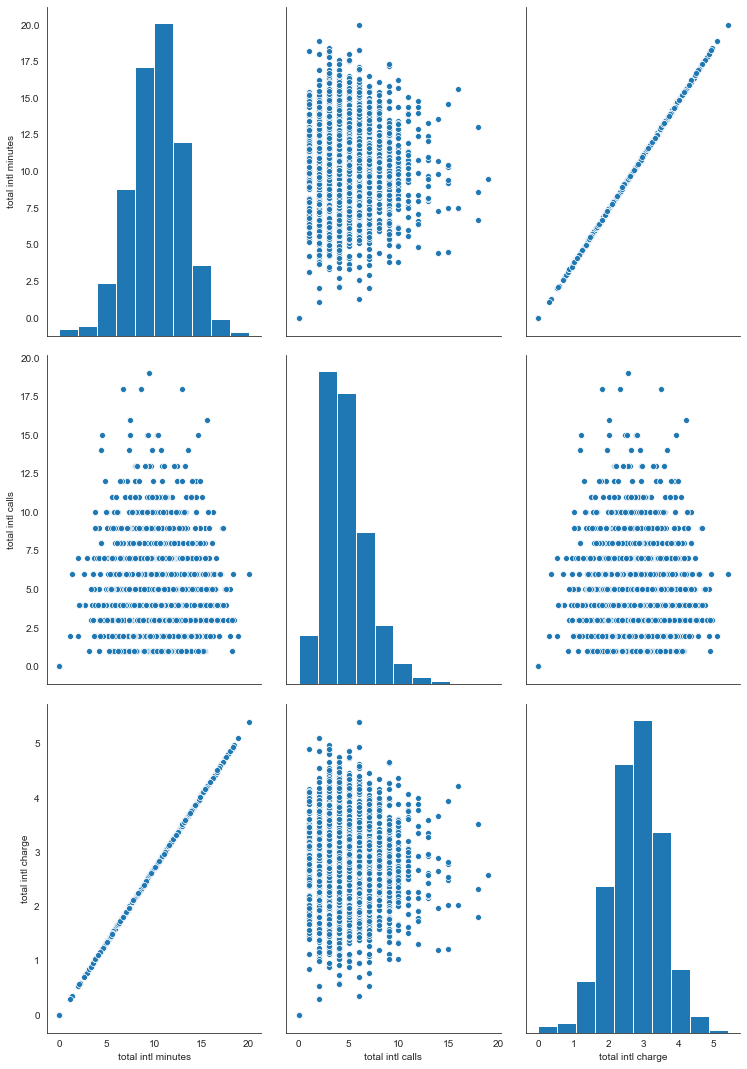

In [208]:
plt.figure(figsize=(5,5))
sns.pairplot(df,x_vars=['total intl minutes', 'total intl calls',
       'total intl charge'],y_vars=['total intl minutes', 'total intl calls',
       'total intl charge'],size=5,aspect=0.7)
plt.show()

In [ ]:
==>'total intl minutes' and  'total intl charge' are linearly associated.
       

In [194]:
sns.pairplot(df,x_vars=df.drop('churn',axis=1).columns,y_vars='churn',size=5,aspect=0.7)
plt.show()

KeyboardInterrupt: 

In [ ]:
## Co-relation Matrix:

In [191]:
df.corr()

number vmail messages  total day minutes  \
number vmail messages                1.000000           0.002919   
total day minutes                    0.002919           1.000000   
total day calls                     -0.001152           0.007051   
total day charge                     0.002920           1.000000   
total eve minutes                    0.014829           0.005206   
total eve calls                     -0.002027           0.030826   
total eve charge                     0.014849           0.005193   
total night minutes                  0.009483          -0.004404   
total night calls                    0.013846           0.025727   
total night charge                   0.009454          -0.004420   
total intl minutes                   0.024719          -0.013980   
total intl calls                     0.016462           0.003140   
total intl charge                    0.024790          -0.013921   
customer service calls              -0.005461          -0.020172   
churn                               -0.083977           0.204972   

                        total day calls  total day charge  total eve minutes  \
number vmail messages         -0.001152          0.002920           0.014829   
total day minutes              0.007051          1.000000           0.005206   
total day calls                1.000000          0.007050          -0.014018   
total day charge               0.007050          1.000000           0.005215   
total eve minutes             -0.014018          0.005215           1.000000   
total eve calls                0.006259          0.030826          -0.005246   
total eve charge              -0.014015          0.005202           1.000000   
total night minutes            0.015621         -0.004404          -0.012475   
total night calls             -0.009646          0.025725           0.012121   
total night charge             0.015610         -0.004419          -0.012470   
total intl minutes             0.005286         -0.013983          -0.011771   
total intl calls               0.003831          0.003140           0.010166   
total intl charge              0.005424         -0.013924          -0.011819   
customer service calls        -0.022402         -0.020176          -0.011914   
churn                          0.011361          0.204970           0.092612   

                        total eve calls  total eve charge  \
number vmail messages         -0.002027          0.014849   
total day minutes              0.030826          0.005193   
total day calls                0.006259         -0.014015   
total day charge               0.030826          0.005202   
total eve minutes             -0.005246          1.000000   
total eve calls                1.000000         -0.005240   
total eve charge              -0.005240          1.000000   
total night minutes           -0.005777         -0.012481   
total night calls              0.012204          0.012135   
total night charge            -0.005730         -0.012476   
total intl minutes             0.007533         -0.011780   
total intl calls               0.003257          0.010165   
total intl charge              0.007500         -0.011828   
customer service calls         0.012426         -0.011924   
churn                          0.016689          0.092596   

                        total night minutes  total night calls  \
number vmail messages              0.009483           0.013846   
total day minutes                 -0.004404           0.025727   
total day calls                    0.015621          -0.009646   
total day charge                  -0.004404           0.025725   
total eve minutes                 -0.012475           0.012121   
total eve calls                   -0.005777           0.012204   
total eve charge                  -0.012481           0.012135   
total night minutes                1.000000           0.000383   
total night calls                  0.000383           1.000000   
total night charg

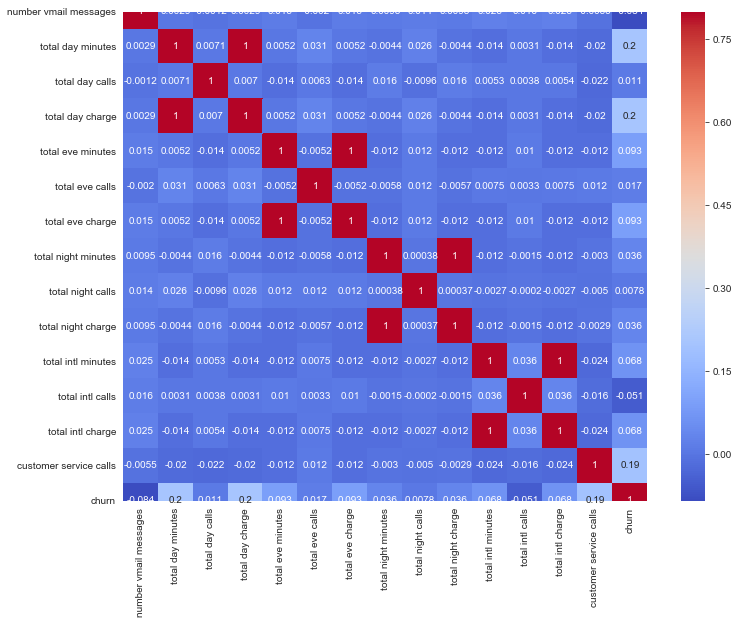

In [192]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,cmap='coolwarm');

In [ ]:
==> 'total day charge' and 'total day minutes' are highly associated with Co-relation co-efficient of 1
==> 'total eve charge' and 'total eve minutes' are highly associated with Co-relation co-efficient of 1
==>'total night charge' and 'total night minutes' are highly associated with Co-relation co-efficient of 1
==>'total intl minutes' and  'total intl charge' are highly associated with Co-relation co-efficient of 1
       

In [ ]:
## Co-relation Matrix Output Variable:'churn' ------(Zoomed Heatmap style)

In [210]:
plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',cmap='coolwarm', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

AttributeError: 'float' object has no attribute 'shape'

<Figure size 720x720 with 0 Axes>

In [4]:
df['churn']=np.where(df['churn']==True,1,0)

In [5]:
df['churn'].value_counts()

0    2563
1     436
Name: churn, dtype: int64

In [ ]:
#Differentiate Input and Output variables:

In [5]:
x=df.drop(['churn','phone number'],axis=1) # Input Variable-- We can drop phone number as it is not significant
y=df['churn']               # Output Variable

In [7]:
type(x)

pandas.core.frame.DataFrame

In [278]:
type(y)

pandas.core.series.Series

In [204]:
x_cat=x.select_dtypes(include='object')

In [205]:
x_cat

international plan voice mail plan
0                    no             yes
1                    no             yes
2                    no              no
3                   yes              no
4                   yes              no
...                 ...             ...
2994                 no              no
2995                 no             yes
2996                 no             yes
2997                 no             yes
2998                 no              no

[2999 rows x 2 columns]

In [ ]:
## Add dummy Variablesusing One Hot encoding for Categorical Features: 'international plan' and 'voice mail plan'----

In [6]:
x=pd.get_dummies(x,['international plan','voice mail plan'])

In [10]:
x.columns

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'international plan_no',
       'international plan_yes', 'voice mail plan_no', 'voice mail plan_yes'],
      dtype='object')

In [211]:
type(x)

pandas.core.frame.DataFrame

In [281]:
y=y.apply(lambda x:1 if x==True else 0)

In [282]:
y.value_counts()

0    2563
1     436
Name: churn, dtype: int64

In [11]:
#Split data into train and test:

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [13]:
type(x_train)

pandas.core.frame.DataFrame

In [14]:
#Logistic regression:

In [8]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [9]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [10]:
#Prediction:
y_pred_test=lreg.predict(x_test)
y_pred_train=lreg.predict(x_train)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

print("Test Summary\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print("*"*50)
print("\nTrain Summary\n")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Test Summary

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       512
           1       0.36      0.06      0.10        88

    accuracy                           0.85       600
   macro avg       0.61      0.52      0.51       600
weighted avg       0.78      0.85      0.80       600

[[503   9]
 [ 83   5]]


**************************************************

Train Summary

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2051
           1       0.49      0.08      0.13       348

    accuracy                           0.85      2399
   macro avg       0.68      0.53      0.53      2399
weighted avg       0.81      0.85      0.81      2399

[[2023   28]
 [ 321   27]]


In [12]:
#Drop :'total day charge','total eve charge','total night charge','total intl charge'
del_col=['total day charge','total eve charge','total night charge','total intl charge']

In [13]:
import statsmodels.api as sm
model=sm.Logit(y_train,x_train.drop(del_col,axis=1))

In [14]:
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.326206
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.2121
Time:                        21:14:35   Log-Likelihood:                -782.57
converged:                       True   LL-Null:                       -993.29
Covariance Type:            nonrobust   LLR p-value:                 1.079e-82
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
number vmail messages      0.0557      0.021      2.660      0.008       0.015       0.097
total day minutes          0.0127      0.001     10.061      0.000       0.010       0.015
total day calls            0.0010      0.003      0.318      0.751      -0.005       0.007
total eve minutes          0.0064      0.001      4.691      0.000       0.004       0.009
total eve calls            0.0046      0.003      1.384      0.166      -0.002       0.011
total night minutes        0.0042      0.001      3.177      0.001       0.002       0.007
total night calls          0.0001      0.003      0.039      0.969      -0.006       0.007
total intl minutes         0.0867      0.023      3.697      0.000       0.041       0.133
total intl calls          -0.0928      0.029     -3.152      0.002      -0.150      -0.035
customer service calls     0.5012      0.046     10.818      0.000       0.410       0.592
international plan_no     -5.3953    4.7e+06  -1.15e-06      1.000   -9.21e+06    9.21e+06
international plan_yes    -3.3714    4.7e+06  -7.18e-07      1.000   -9.21e+06    9.21e+06
voice mail plan_no        -3.0614    4.7e+06  -6.52e-07      1.000   -9.21e+06    9.21e+06
voice mail plan_yes       -5.7053    4.7e+06  -1.21e-06      1.000   -9.21e+06    9.21e+06
==========================================================================================
"""

In [15]:
lreg.fit(x_train.drop(del_col,axis=1),y_train)

LogisticRegression()

In [16]:
#Prediction:
y_pred_test=lreg.predict(x_test.drop(del_col,axis=1))
y_pred_train=lreg.predict(x_train.drop(del_col,axis=1))

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

print("Test Summary\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print("*"*50)
print("\nTrain Summary\n")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Test Summary

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       512
           1       0.39      0.08      0.13        88

    accuracy                           0.85       600
   macro avg       0.62      0.53      0.52       600
weighted avg       0.79      0.85      0.80       600

[[501  11]
 [ 81   7]]


**************************************************

Train Summary

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2051
           1       0.52      0.11      0.18       348

    accuracy                           0.86      2399
   macro avg       0.69      0.54      0.55      2399
weighted avg       0.82      0.86      0.81      2399

[[2017   34]
 [ 311   37]]


In [18]:
print('Accuracy_Score_Loigistic Regression: %.3f' %accuracy_score(y_test,y_pred_test))
print('F1_Score_Loigistic Regression: %.3f' %f1_score(y_test,y_pred_test))

Accuracy_Score_Loigistic Regression: 0.847
F1_Score_Loigistic Regression: 0.132


In [28]:
#Decision Tree:

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train.drop(del_col,axis=1),y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_pred_test=classifier.predict(x_test.drop(del_col,axis=1))
y_pred_train=classifier.predict(x_train.drop(del_col,axis=1))

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

print("Test Summary\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print("*"*50)
print("\nTrain Summary\n")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Test Summary

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       512
           1       0.68      0.61      0.64        88

    accuracy                           0.90       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.90      0.90      0.90       600

[[486  26]
 [ 34  54]]


**************************************************

Train Summary

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2051
           1       1.00      1.00      1.00       348

    accuracy                           1.00      2399
   macro avg       1.00      1.00      1.00      2399
weighted avg       1.00      1.00      1.00      2399

[[2051    0]
 [   0  348]]


In [22]:
print('Accuracy_Score_Decision Tree: %.3f' %accuracy_score(y_test,y_pred_test))
print('F1_Score_Decision Tree: %.3f' %f1_score(y_test,y_pred_test))

Accuracy_Score_Decision Tree: 0.900
F1_Score_Decision Tree: 0.643


In [23]:
#Random_Forest:

In [24]:
from sklearn.ensemble import RandomForestClassifier
ran_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
ran_classifier.fit(x_train.drop(del_col,axis=1), y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [25]:
y_pred_test=ran_classifier.predict(x_test.drop(del_col,axis=1))
y_pred_train=ran_classifier.predict(x_train.drop(del_col,axis=1))

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

print("Test Summary\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print("*"*50)
print("\nTrain Summary\n")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Test Summary

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       512
           1       0.87      0.60      0.71        88

    accuracy                           0.93       600
   macro avg       0.90      0.79      0.84       600
weighted avg       0.93      0.93      0.92       600

[[504   8]
 [ 35  53]]


**************************************************

Train Summary

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2051
           1       1.00      0.97      0.98       348

    accuracy                           0.99      2399
   macro avg       1.00      0.98      0.99      2399
weighted avg       1.00      0.99      0.99      2399

[[2050    1]
 [  11  337]]


In [27]:
print('Accuracy_Score_Random Forest: %.3f' %accuracy_score(y_test,y_pred_test))
print('F1_Score_Random Forest: %.3f' %f1_score(y_test,y_pred_test))

Accuracy_Score_Random Forest: 0.928
F1_Score_Random Forest: 0.711


In [28]:
#xgboost:

In [29]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train.drop(del_col,axis=1), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
y_pred_test=xgb_classifier.predict(x_test.drop(del_col,axis=1))
y_pred_train=xgb_classifier.predict(x_train.drop(del_col,axis=1))

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

print("Test Summary\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print("*"*50)
print("\nTrain Summary\n")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Test Summary

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       512
           1       0.91      0.72      0.80        88

    accuracy                           0.95       600
   macro avg       0.93      0.85      0.89       600
weighted avg       0.95      0.95      0.95       600

[[506   6]
 [ 25  63]]


**************************************************

Train Summary

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2051
           1       1.00      1.00      1.00       348

    accuracy                           1.00      2399
   macro avg       1.00      1.00      1.00      2399
weighted avg       1.00      1.00      1.00      2399

[[2051    0]
 [   0  348]]


In [32]:
print('Accuracy_Score_XGBoost: %.3f' %accuracy_score(y_test,y_pred_test))
print('F1_Score_XGBoost: %.3f' %f1_score(y_test,y_pred_test))

Accuracy_Score_XGBoost: 0.948
F1_Score_XGBoost: 0.803


In [33]:
# K-fold cross validation:

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_classifier, X = x_train.drop(del_col,axis=1), y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.08 %
Standard Deviation: 1.22 %


In [35]:
accuracies

array([0.95      , 0.95833333, 0.93333333, 0.95416667, 0.95      ,
       0.95      , 0.9625    , 0.94166667, 0.975     , 0.93305439])

In [ ]:
#stratified Cross Validation:

In [46]:
#Catboost:

In [47]:
from catboost import CatBoostClassifier
cat_classifier=CatBoostClassifier()

In [48]:
cat_classifier.fit(x_train.drop(del_col,axis=1), y_train)

Learning rate set to 0.014969
0:	learn: 0.6756420	total: 75.4ms	remaining: 1m 15s
1:	learn: 0.6631575	total: 78.7ms	remaining: 39.3s
2:	learn: 0.6478942	total: 81.3ms	remaining: 27s
3:	learn: 0.6322866	total: 84.1ms	remaining: 20.9s
4:	learn: 0.6185384	total: 86.7ms	remaining: 17.2s
5:	learn: 0.6072821	total: 91ms	remaining: 15.1s
6:	learn: 0.5963522	total: 93.8ms	remaining: 13.3s
7:	learn: 0.5847817	total: 96.6ms	remaining: 12s
8:	learn: 0.5748526	total: 99.5ms	remaining: 11s
9:	learn: 0.5637132	total: 102ms	remaining: 10.1s
10:	learn: 0.5510983	total: 105ms	remaining: 9.48s
11:	learn: 0.5401386	total: 108ms	remaining: 8.93s
12:	learn: 0.5310764	total: 111ms	remaining: 8.42s
13:	learn: 0.5223042	total: 113ms	remaining: 7.99s
14:	learn: 0.5139071	total: 116ms	remaining: 7.61s
15:	learn: 0.5021223	total: 119ms	remaining: 7.31s
16:	learn: 0.4942232	total: 122ms	remaining: 7.04s
17:	learn: 0.4865373	total: 124ms	remaining: 6.78s
18:	learn: 0.4802220	total: 129ms	remaining: 6.67s
19:	learn

200:	learn: 0.1694655	total: 630ms	remaining: 2.5s
201:	learn: 0.1690364	total: 633ms	remaining: 2.5s
202:	learn: 0.1687328	total: 636ms	remaining: 2.5s
203:	learn: 0.1684641	total: 638ms	remaining: 2.49s
204:	learn: 0.1682017	total: 642ms	remaining: 2.49s
205:	learn: 0.1680002	total: 645ms	remaining: 2.48s
206:	learn: 0.1674981	total: 647ms	remaining: 2.48s
207:	learn: 0.1672266	total: 650ms	remaining: 2.47s
208:	learn: 0.1670088	total: 653ms	remaining: 2.47s
209:	learn: 0.1666970	total: 655ms	remaining: 2.46s
210:	learn: 0.1664948	total: 658ms	remaining: 2.46s
211:	learn: 0.1661940	total: 661ms	remaining: 2.46s
212:	learn: 0.1657460	total: 664ms	remaining: 2.45s
213:	learn: 0.1654118	total: 666ms	remaining: 2.45s
214:	learn: 0.1651694	total: 669ms	remaining: 2.44s
215:	learn: 0.1648648	total: 672ms	remaining: 2.44s
216:	learn: 0.1644376	total: 675ms	remaining: 2.43s
217:	learn: 0.1640907	total: 677ms	remaining: 2.43s
218:	learn: 0.1637826	total: 680ms	remaining: 2.42s
219:	learn: 0.1

371:	learn: 0.1335508	total: 1.22s	remaining: 2.07s
372:	learn: 0.1334336	total: 1.23s	remaining: 2.06s
373:	learn: 0.1333461	total: 1.23s	remaining: 2.06s
374:	learn: 0.1332101	total: 1.23s	remaining: 2.05s
375:	learn: 0.1330088	total: 1.23s	remaining: 2.05s
376:	learn: 0.1327743	total: 1.24s	remaining: 2.04s
377:	learn: 0.1325710	total: 1.24s	remaining: 2.04s
378:	learn: 0.1325245	total: 1.24s	remaining: 2.04s
379:	learn: 0.1324276	total: 1.24s	remaining: 2.03s
380:	learn: 0.1323360	total: 1.25s	remaining: 2.03s
381:	learn: 0.1321210	total: 1.25s	remaining: 2.02s
382:	learn: 0.1320057	total: 1.25s	remaining: 2.02s
383:	learn: 0.1318202	total: 1.25s	remaining: 2.01s
384:	learn: 0.1317769	total: 1.26s	remaining: 2.01s
385:	learn: 0.1316471	total: 1.26s	remaining: 2s
386:	learn: 0.1314006	total: 1.26s	remaining: 2s
387:	learn: 0.1313263	total: 1.26s	remaining: 2s
388:	learn: 0.1311987	total: 1.27s	remaining: 1.99s
389:	learn: 0.1311062	total: 1.27s	remaining: 1.99s
390:	learn: 0.1309859

555:	learn: 0.1136038	total: 1.7s	remaining: 1.36s
556:	learn: 0.1135345	total: 1.71s	remaining: 1.36s
557:	learn: 0.1134736	total: 1.71s	remaining: 1.35s
558:	learn: 0.1133739	total: 1.71s	remaining: 1.35s
559:	learn: 0.1132859	total: 1.71s	remaining: 1.35s
560:	learn: 0.1131497	total: 1.72s	remaining: 1.34s
561:	learn: 0.1130059	total: 1.72s	remaining: 1.34s
562:	learn: 0.1128781	total: 1.72s	remaining: 1.33s
563:	learn: 0.1127529	total: 1.72s	remaining: 1.33s
564:	learn: 0.1126540	total: 1.73s	remaining: 1.33s
565:	learn: 0.1125426	total: 1.73s	remaining: 1.32s
566:	learn: 0.1124241	total: 1.73s	remaining: 1.32s
567:	learn: 0.1123091	total: 1.73s	remaining: 1.32s
568:	learn: 0.1122585	total: 1.74s	remaining: 1.31s
569:	learn: 0.1122306	total: 1.74s	remaining: 1.31s
570:	learn: 0.1121064	total: 1.74s	remaining: 1.31s
571:	learn: 0.1120478	total: 1.74s	remaining: 1.3s
572:	learn: 0.1119394	total: 1.75s	remaining: 1.3s
573:	learn: 0.1118377	total: 1.75s	remaining: 1.3s
574:	learn: 0.11

733:	learn: 0.0972034	total: 2.18s	remaining: 789ms
734:	learn: 0.0971396	total: 2.18s	remaining: 786ms
735:	learn: 0.0969962	total: 2.18s	remaining: 783ms
736:	learn: 0.0969675	total: 2.18s	remaining: 780ms
737:	learn: 0.0969083	total: 2.19s	remaining: 777ms
738:	learn: 0.0968609	total: 2.19s	remaining: 774ms
739:	learn: 0.0967487	total: 2.19s	remaining: 770ms
740:	learn: 0.0966444	total: 2.2s	remaining: 768ms
741:	learn: 0.0965738	total: 2.2s	remaining: 765ms
742:	learn: 0.0964710	total: 2.2s	remaining: 762ms
743:	learn: 0.0963615	total: 2.2s	remaining: 759ms
744:	learn: 0.0963428	total: 2.21s	remaining: 756ms
745:	learn: 0.0962730	total: 2.21s	remaining: 752ms
746:	learn: 0.0961969	total: 2.21s	remaining: 749ms
747:	learn: 0.0961395	total: 2.21s	remaining: 746ms
748:	learn: 0.0960581	total: 2.22s	remaining: 743ms
749:	learn: 0.0959906	total: 2.22s	remaining: 740ms
750:	learn: 0.0959041	total: 2.22s	remaining: 737ms
751:	learn: 0.0957689	total: 2.23s	remaining: 735ms
752:	learn: 0.09

906:	learn: 0.0844827	total: 2.65s	remaining: 272ms
907:	learn: 0.0843803	total: 2.65s	remaining: 269ms
908:	learn: 0.0843669	total: 2.66s	remaining: 266ms
909:	learn: 0.0843548	total: 2.66s	remaining: 263ms
910:	learn: 0.0843430	total: 2.66s	remaining: 260ms
911:	learn: 0.0842490	total: 2.66s	remaining: 257ms
912:	learn: 0.0841420	total: 2.67s	remaining: 254ms
913:	learn: 0.0841129	total: 2.67s	remaining: 251ms
914:	learn: 0.0841036	total: 2.67s	remaining: 248ms
915:	learn: 0.0840527	total: 2.67s	remaining: 245ms
916:	learn: 0.0839527	total: 2.68s	remaining: 242ms
917:	learn: 0.0839110	total: 2.68s	remaining: 239ms
918:	learn: 0.0838940	total: 2.68s	remaining: 236ms
919:	learn: 0.0838248	total: 2.68s	remaining: 233ms
920:	learn: 0.0837582	total: 2.69s	remaining: 231ms
921:	learn: 0.0837351	total: 2.69s	remaining: 228ms
922:	learn: 0.0836844	total: 2.69s	remaining: 225ms
923:	learn: 0.0836015	total: 2.7s	remaining: 222ms
924:	learn: 0.0834986	total: 2.7s	remaining: 219ms
925:	learn: 0.

In [49]:
y_pred_test=cat_classifier.predict(x_test.drop(del_col,axis=1))
y_pred_train=cat_classifier.predict(x_train.drop(del_col,axis=1))

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

print("Test Summary\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print("*"*50)
print("\nTrain Summary\n")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

Test Summary

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       517
           1       0.97      0.76      0.85        83

    accuracy                           0.96       600
   macro avg       0.97      0.88      0.92       600
weighted avg       0.96      0.96      0.96       600

[[515   2]
 [ 20  63]]


**************************************************

Train Summary

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2046
           1       1.00      0.87      0.93       353

    accuracy                           0.98      2399
   macro avg       0.99      0.93      0.96      2399
weighted avg       0.98      0.98      0.98      2399

[[2046    0]
 [  47  306]]


In [51]:
print('Accuracy_Score_CatBoost: %.3f' %accuracy_score(y_test,y_pred_test))
print('F1_Score_CatBoost: %.3f' %f1_score(y_test,y_pred_test))

Accuracy_Score_CatBoost: 0.963
F1_Score_CatBoost: 0.851


In [43]:
# K-fold cross validation:

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cat_classifier, X = x_train.drop(del_col,axis=1), y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.014311
0:	learn: 0.6802169	total: 3.63ms	remaining: 3.63s
1:	learn: 0.6693386	total: 6.14ms	remaining: 3.06s
2:	learn: 0.6545576	total: 8.98ms	remaining: 2.98s
3:	learn: 0.6432537	total: 11.7ms	remaining: 2.92s
4:	learn: 0.6295384	total: 14.2ms	remaining: 2.83s
5:	learn: 0.6185924	total: 16.8ms	remaining: 2.78s
6:	learn: 0.6103074	total: 19.3ms	remaining: 2.73s
7:	learn: 0.5981430	total: 21.7ms	remaining: 2.7s
8:	learn: 0.5884607	total: 24.4ms	remaining: 2.68s
9:	learn: 0.5775558	total: 26.9ms	remaining: 2.66s
10:	learn: 0.5662796	total: 29.7ms	remaining: 2.67s
11:	learn: 0.5555427	total: 32.2ms	remaining: 2.65s
12:	learn: 0.5466205	total: 34.6ms	remaining: 2.63s
13:	learn: 0.5378294	total: 37ms	remaining: 2.6s
14:	learn: 0.5294020	total: 39.3ms	remaining: 2.58s
15:	learn: 0.5182858	total: 41.9ms	remaining: 2.57s
16:	learn: 0.5101765	total: 44.5ms	remaining: 2.57s
17:	learn: 0.5026343	total: 47ms	remaining: 2.56s
18:	learn: 0.4963496	total: 50.1ms	remaining: 2.59

173:	learn: 0.1886003	total: 462ms	remaining: 2.19s
174:	learn: 0.1881982	total: 465ms	remaining: 2.19s
175:	learn: 0.1877034	total: 467ms	remaining: 2.19s
176:	learn: 0.1872504	total: 469ms	remaining: 2.18s
177:	learn: 0.1867228	total: 472ms	remaining: 2.18s
178:	learn: 0.1864115	total: 474ms	remaining: 2.17s
179:	learn: 0.1861076	total: 477ms	remaining: 2.17s
180:	learn: 0.1856308	total: 479ms	remaining: 2.17s
181:	learn: 0.1852171	total: 482ms	remaining: 2.16s
182:	learn: 0.1850155	total: 484ms	remaining: 2.16s
183:	learn: 0.1845364	total: 488ms	remaining: 2.16s
184:	learn: 0.1840945	total: 491ms	remaining: 2.16s
185:	learn: 0.1838705	total: 493ms	remaining: 2.16s
186:	learn: 0.1836068	total: 496ms	remaining: 2.16s
187:	learn: 0.1831448	total: 499ms	remaining: 2.15s
188:	learn: 0.1826992	total: 502ms	remaining: 2.15s
189:	learn: 0.1822657	total: 504ms	remaining: 2.15s
190:	learn: 0.1817497	total: 507ms	remaining: 2.15s
191:	learn: 0.1814079	total: 509ms	remaining: 2.14s
192:	learn: 

386:	learn: 0.1394422	total: 1.07s	remaining: 1.7s
387:	learn: 0.1393008	total: 1.07s	remaining: 1.69s
388:	learn: 0.1391100	total: 1.08s	remaining: 1.69s
389:	learn: 0.1389511	total: 1.08s	remaining: 1.69s
390:	learn: 0.1388542	total: 1.08s	remaining: 1.68s
391:	learn: 0.1386224	total: 1.08s	remaining: 1.68s
392:	learn: 0.1385015	total: 1.09s	remaining: 1.68s
393:	learn: 0.1383032	total: 1.09s	remaining: 1.68s
394:	learn: 0.1381041	total: 1.09s	remaining: 1.67s
395:	learn: 0.1380679	total: 1.09s	remaining: 1.67s
396:	learn: 0.1379544	total: 1.1s	remaining: 1.67s
397:	learn: 0.1378611	total: 1.1s	remaining: 1.67s
398:	learn: 0.1376979	total: 1.1s	remaining: 1.66s
399:	learn: 0.1376397	total: 1.11s	remaining: 1.66s
400:	learn: 0.1375200	total: 1.11s	remaining: 1.66s
401:	learn: 0.1373641	total: 1.11s	remaining: 1.65s
402:	learn: 0.1372105	total: 1.11s	remaining: 1.65s
403:	learn: 0.1370534	total: 1.12s	remaining: 1.65s
404:	learn: 0.1369420	total: 1.12s	remaining: 1.65s
405:	learn: 0.13

550:	learn: 0.1202931	total: 1.53s	remaining: 1.25s
551:	learn: 0.1201218	total: 1.53s	remaining: 1.24s
552:	learn: 0.1200635	total: 1.54s	remaining: 1.24s
553:	learn: 0.1200468	total: 1.54s	remaining: 1.24s
554:	learn: 0.1198833	total: 1.54s	remaining: 1.24s
555:	learn: 0.1197454	total: 1.54s	remaining: 1.23s
556:	learn: 0.1196879	total: 1.55s	remaining: 1.23s
557:	learn: 0.1195613	total: 1.55s	remaining: 1.23s
558:	learn: 0.1194575	total: 1.55s	remaining: 1.22s
559:	learn: 0.1193175	total: 1.55s	remaining: 1.22s
560:	learn: 0.1192103	total: 1.56s	remaining: 1.22s
561:	learn: 0.1190847	total: 1.56s	remaining: 1.22s
562:	learn: 0.1189832	total: 1.56s	remaining: 1.21s
563:	learn: 0.1189139	total: 1.56s	remaining: 1.21s
564:	learn: 0.1188333	total: 1.57s	remaining: 1.21s
565:	learn: 0.1187394	total: 1.57s	remaining: 1.2s
566:	learn: 0.1184723	total: 1.57s	remaining: 1.2s
567:	learn: 0.1183573	total: 1.57s	remaining: 1.2s
568:	learn: 0.1182243	total: 1.58s	remaining: 1.19s
569:	learn: 0.1

730:	learn: 0.1037695	total: 2s	remaining: 737ms
731:	learn: 0.1036649	total: 2.01s	remaining: 735ms
732:	learn: 0.1035275	total: 2.01s	remaining: 732ms
733:	learn: 0.1035042	total: 2.01s	remaining: 729ms
734:	learn: 0.1034928	total: 2.01s	remaining: 726ms
735:	learn: 0.1033348	total: 2.02s	remaining: 723ms
736:	learn: 0.1031986	total: 2.02s	remaining: 720ms
737:	learn: 0.1031322	total: 2.02s	remaining: 717ms
738:	learn: 0.1029983	total: 2.02s	remaining: 714ms
739:	learn: 0.1029697	total: 2.02s	remaining: 711ms
740:	learn: 0.1029569	total: 2.03s	remaining: 709ms
741:	learn: 0.1028359	total: 2.03s	remaining: 706ms
742:	learn: 0.1027855	total: 2.03s	remaining: 703ms
743:	learn: 0.1026657	total: 2.03s	remaining: 700ms
744:	learn: 0.1025461	total: 2.04s	remaining: 697ms
745:	learn: 0.1024222	total: 2.04s	remaining: 694ms
746:	learn: 0.1023295	total: 2.04s	remaining: 692ms
747:	learn: 0.1022196	total: 2.04s	remaining: 689ms
748:	learn: 0.1021158	total: 2.05s	remaining: 686ms
749:	learn: 0.1

918:	learn: 0.0890811	total: 2.48s	remaining: 219ms
919:	learn: 0.0890233	total: 2.48s	remaining: 216ms
920:	learn: 0.0888890	total: 2.48s	remaining: 213ms
921:	learn: 0.0888195	total: 2.49s	remaining: 210ms
922:	learn: 0.0887089	total: 2.49s	remaining: 208ms
923:	learn: 0.0885832	total: 2.49s	remaining: 205ms
924:	learn: 0.0885338	total: 2.49s	remaining: 202ms
925:	learn: 0.0885088	total: 2.5s	remaining: 200ms
926:	learn: 0.0884068	total: 2.5s	remaining: 197ms
927:	learn: 0.0883182	total: 2.5s	remaining: 194ms
928:	learn: 0.0882337	total: 2.5s	remaining: 191ms
929:	learn: 0.0881315	total: 2.51s	remaining: 189ms
930:	learn: 0.0879256	total: 2.51s	remaining: 186ms
931:	learn: 0.0878506	total: 2.51s	remaining: 183ms
932:	learn: 0.0877276	total: 2.51s	remaining: 181ms
933:	learn: 0.0876409	total: 2.52s	remaining: 178ms
934:	learn: 0.0876039	total: 2.52s	remaining: 175ms
935:	learn: 0.0875857	total: 2.52s	remaining: 173ms
936:	learn: 0.0874959	total: 2.53s	remaining: 170ms
937:	learn: 0.08

101:	learn: 0.2335626	total: 317ms	remaining: 2.79s
102:	learn: 0.2324276	total: 319ms	remaining: 2.78s
103:	learn: 0.2314673	total: 321ms	remaining: 2.76s
104:	learn: 0.2304169	total: 323ms	remaining: 2.75s
105:	learn: 0.2291088	total: 327ms	remaining: 2.75s
106:	learn: 0.2281356	total: 329ms	remaining: 2.75s
107:	learn: 0.2270639	total: 331ms	remaining: 2.73s
108:	learn: 0.2261319	total: 334ms	remaining: 2.73s
109:	learn: 0.2253422	total: 336ms	remaining: 2.72s
110:	learn: 0.2245497	total: 338ms	remaining: 2.71s
111:	learn: 0.2238000	total: 341ms	remaining: 2.7s
112:	learn: 0.2227714	total: 343ms	remaining: 2.69s
113:	learn: 0.2219979	total: 346ms	remaining: 2.69s
114:	learn: 0.2208723	total: 348ms	remaining: 2.68s
115:	learn: 0.2200902	total: 351ms	remaining: 2.67s
116:	learn: 0.2192868	total: 353ms	remaining: 2.67s
117:	learn: 0.2182913	total: 356ms	remaining: 2.66s
118:	learn: 0.2173320	total: 358ms	remaining: 2.65s
119:	learn: 0.2164143	total: 360ms	remaining: 2.64s
120:	learn: 0

288:	learn: 0.1483461	total: 786ms	remaining: 1.93s
289:	learn: 0.1482376	total: 789ms	remaining: 1.93s
290:	learn: 0.1478988	total: 791ms	remaining: 1.93s
291:	learn: 0.1478686	total: 794ms	remaining: 1.92s
292:	learn: 0.1476606	total: 796ms	remaining: 1.92s
293:	learn: 0.1473604	total: 799ms	remaining: 1.92s
294:	learn: 0.1471172	total: 802ms	remaining: 1.92s
295:	learn: 0.1468971	total: 804ms	remaining: 1.91s
296:	learn: 0.1466834	total: 807ms	remaining: 1.91s
297:	learn: 0.1465972	total: 809ms	remaining: 1.91s
298:	learn: 0.1464244	total: 812ms	remaining: 1.9s
299:	learn: 0.1463370	total: 814ms	remaining: 1.9s
300:	learn: 0.1461727	total: 817ms	remaining: 1.9s
301:	learn: 0.1459040	total: 819ms	remaining: 1.89s
302:	learn: 0.1458274	total: 822ms	remaining: 1.89s
303:	learn: 0.1455839	total: 824ms	remaining: 1.89s
304:	learn: 0.1453632	total: 827ms	remaining: 1.88s
305:	learn: 0.1452775	total: 830ms	remaining: 1.88s
306:	learn: 0.1451025	total: 832ms	remaining: 1.88s
307:	learn: 0.1

473:	learn: 0.1217563	total: 1.25s	remaining: 1.39s
474:	learn: 0.1215356	total: 1.25s	remaining: 1.39s
475:	learn: 0.1213034	total: 1.26s	remaining: 1.38s
476:	learn: 0.1211496	total: 1.26s	remaining: 1.38s
477:	learn: 0.1209747	total: 1.26s	remaining: 1.38s
478:	learn: 0.1208735	total: 1.27s	remaining: 1.38s
479:	learn: 0.1207323	total: 1.27s	remaining: 1.37s
480:	learn: 0.1205737	total: 1.27s	remaining: 1.37s
481:	learn: 0.1204853	total: 1.27s	remaining: 1.37s
482:	learn: 0.1204585	total: 1.28s	remaining: 1.37s
483:	learn: 0.1202860	total: 1.28s	remaining: 1.36s
484:	learn: 0.1201858	total: 1.28s	remaining: 1.36s
485:	learn: 0.1201593	total: 1.28s	remaining: 1.36s
486:	learn: 0.1199533	total: 1.29s	remaining: 1.35s
487:	learn: 0.1198164	total: 1.29s	remaining: 1.35s
488:	learn: 0.1196547	total: 1.29s	remaining: 1.35s
489:	learn: 0.1195268	total: 1.29s	remaining: 1.35s
490:	learn: 0.1194079	total: 1.3s	remaining: 1.35s
491:	learn: 0.1191826	total: 1.3s	remaining: 1.34s
492:	learn: 0.

655:	learn: 0.1029870	total: 1.85s	remaining: 970ms
656:	learn: 0.1028913	total: 1.85s	remaining: 968ms
657:	learn: 0.1028065	total: 1.86s	remaining: 965ms
658:	learn: 0.1027160	total: 1.86s	remaining: 963ms
659:	learn: 0.1026372	total: 1.86s	remaining: 960ms
660:	learn: 0.1026212	total: 1.87s	remaining: 958ms
661:	learn: 0.1024525	total: 1.87s	remaining: 955ms
662:	learn: 0.1023270	total: 1.87s	remaining: 953ms
663:	learn: 0.1022668	total: 1.88s	remaining: 950ms
664:	learn: 0.1022018	total: 1.88s	remaining: 947ms
665:	learn: 0.1021450	total: 1.89s	remaining: 946ms
666:	learn: 0.1020795	total: 1.89s	remaining: 943ms
667:	learn: 0.1019510	total: 1.89s	remaining: 941ms
668:	learn: 0.1018166	total: 1.9s	remaining: 938ms
669:	learn: 0.1017526	total: 1.9s	remaining: 936ms
670:	learn: 0.1016115	total: 1.9s	remaining: 934ms
671:	learn: 0.1015422	total: 1.91s	remaining: 931ms
672:	learn: 0.1014487	total: 1.91s	remaining: 930ms
673:	learn: 0.1014387	total: 1.92s	remaining: 928ms
674:	learn: 0.1

824:	learn: 0.0892006	total: 2.31s	remaining: 491ms
825:	learn: 0.0890985	total: 2.32s	remaining: 488ms
826:	learn: 0.0890471	total: 2.32s	remaining: 486ms
827:	learn: 0.0890294	total: 2.32s	remaining: 483ms
828:	learn: 0.0889400	total: 2.33s	remaining: 480ms
829:	learn: 0.0888535	total: 2.33s	remaining: 477ms
830:	learn: 0.0888391	total: 2.33s	remaining: 474ms
831:	learn: 0.0886329	total: 2.33s	remaining: 471ms
832:	learn: 0.0885768	total: 2.33s	remaining: 468ms
833:	learn: 0.0885014	total: 2.34s	remaining: 465ms
834:	learn: 0.0883804	total: 2.34s	remaining: 462ms
835:	learn: 0.0883352	total: 2.34s	remaining: 460ms
836:	learn: 0.0882165	total: 2.34s	remaining: 457ms
837:	learn: 0.0881100	total: 2.35s	remaining: 454ms
838:	learn: 0.0880926	total: 2.35s	remaining: 451ms
839:	learn: 0.0880424	total: 2.35s	remaining: 448ms
840:	learn: 0.0879822	total: 2.35s	remaining: 445ms
841:	learn: 0.0878335	total: 2.36s	remaining: 443ms
842:	learn: 0.0877847	total: 2.36s	remaining: 440ms
843:	learn: 

Learning rate set to 0.014311
0:	learn: 0.6800085	total: 3.89ms	remaining: 3.89s
1:	learn: 0.6689945	total: 8.01ms	remaining: 4s
2:	learn: 0.6565772	total: 10.6ms	remaining: 3.51s
3:	learn: 0.6443437	total: 13.1ms	remaining: 3.25s
4:	learn: 0.6304603	total: 15.6ms	remaining: 3.1s
5:	learn: 0.6193612	total: 18.3ms	remaining: 3.03s
6:	learn: 0.6096613	total: 22.4ms	remaining: 3.17s
7:	learn: 0.5982404	total: 25ms	remaining: 3.1s
8:	learn: 0.5883328	total: 27.6ms	remaining: 3.03s
9:	learn: 0.5772456	total: 30ms	remaining: 2.97s
10:	learn: 0.5659771	total: 33.1ms	remaining: 2.98s
11:	learn: 0.5566276	total: 35.7ms	remaining: 2.94s
12:	learn: 0.5474575	total: 38.2ms	remaining: 2.9s
13:	learn: 0.5383856	total: 40.7ms	remaining: 2.86s
14:	learn: 0.5297323	total: 43ms	remaining: 2.83s
15:	learn: 0.5180850	total: 45.7ms	remaining: 2.81s
16:	learn: 0.5100413	total: 48.1ms	remaining: 2.78s
17:	learn: 0.5021881	total: 50.3ms	remaining: 2.75s
18:	learn: 0.4957553	total: 52.7ms	remaining: 2.72s
19:	

199:	learn: 0.1759638	total: 633ms	remaining: 2.53s
200:	learn: 0.1754456	total: 635ms	remaining: 2.53s
201:	learn: 0.1751001	total: 638ms	remaining: 2.52s
202:	learn: 0.1747625	total: 641ms	remaining: 2.52s
203:	learn: 0.1743015	total: 644ms	remaining: 2.51s
204:	learn: 0.1740804	total: 647ms	remaining: 2.51s
205:	learn: 0.1736500	total: 649ms	remaining: 2.5s
206:	learn: 0.1732923	total: 652ms	remaining: 2.5s
207:	learn: 0.1730463	total: 655ms	remaining: 2.49s
208:	learn: 0.1727347	total: 658ms	remaining: 2.49s
209:	learn: 0.1723826	total: 660ms	remaining: 2.48s
210:	learn: 0.1720435	total: 663ms	remaining: 2.48s
211:	learn: 0.1717010	total: 666ms	remaining: 2.47s
212:	learn: 0.1714103	total: 669ms	remaining: 2.47s
213:	learn: 0.1711192	total: 672ms	remaining: 2.47s
214:	learn: 0.1707676	total: 674ms	remaining: 2.46s
215:	learn: 0.1704683	total: 677ms	remaining: 2.46s
216:	learn: 0.1701757	total: 680ms	remaining: 2.45s
217:	learn: 0.1698696	total: 682ms	remaining: 2.45s
218:	learn: 0.

378:	learn: 0.1377394	total: 1.1s	remaining: 1.8s
379:	learn: 0.1376143	total: 1.1s	remaining: 1.8s
380:	learn: 0.1374045	total: 1.1s	remaining: 1.8s
381:	learn: 0.1371955	total: 1.11s	remaining: 1.79s
382:	learn: 0.1370672	total: 1.11s	remaining: 1.79s
383:	learn: 0.1369687	total: 1.11s	remaining: 1.79s
384:	learn: 0.1367542	total: 1.12s	remaining: 1.78s
385:	learn: 0.1365121	total: 1.12s	remaining: 1.78s
386:	learn: 0.1363394	total: 1.12s	remaining: 1.78s
387:	learn: 0.1362057	total: 1.12s	remaining: 1.77s
388:	learn: 0.1360657	total: 1.13s	remaining: 1.77s
389:	learn: 0.1358737	total: 1.13s	remaining: 1.76s
390:	learn: 0.1356949	total: 1.13s	remaining: 1.76s
391:	learn: 0.1354408	total: 1.14s	remaining: 1.76s
392:	learn: 0.1353279	total: 1.14s	remaining: 1.76s
393:	learn: 0.1352274	total: 1.14s	remaining: 1.75s
394:	learn: 0.1351082	total: 1.14s	remaining: 1.75s
395:	learn: 0.1350219	total: 1.15s	remaining: 1.75s
396:	learn: 0.1348939	total: 1.15s	remaining: 1.75s
397:	learn: 0.1347

544:	learn: 0.1177950	total: 1.56s	remaining: 1.3s
545:	learn: 0.1177263	total: 1.56s	remaining: 1.3s
546:	learn: 0.1177054	total: 1.57s	remaining: 1.3s
547:	learn: 0.1176181	total: 1.57s	remaining: 1.29s
548:	learn: 0.1175471	total: 1.57s	remaining: 1.29s
549:	learn: 0.1175041	total: 1.57s	remaining: 1.29s
550:	learn: 0.1174355	total: 1.58s	remaining: 1.28s
551:	learn: 0.1173205	total: 1.58s	remaining: 1.28s
552:	learn: 0.1171974	total: 1.58s	remaining: 1.28s
553:	learn: 0.1171202	total: 1.58s	remaining: 1.27s
554:	learn: 0.1170306	total: 1.59s	remaining: 1.27s
555:	learn: 0.1169881	total: 1.59s	remaining: 1.27s
556:	learn: 0.1168261	total: 1.59s	remaining: 1.27s
557:	learn: 0.1166487	total: 1.59s	remaining: 1.26s
558:	learn: 0.1166291	total: 1.6s	remaining: 1.26s
559:	learn: 0.1165993	total: 1.6s	remaining: 1.26s
560:	learn: 0.1164571	total: 1.6s	remaining: 1.25s
561:	learn: 0.1162711	total: 1.6s	remaining: 1.25s
562:	learn: 0.1161571	total: 1.61s	remaining: 1.25s
563:	learn: 0.11606

729:	learn: 0.1001616	total: 2.03s	remaining: 750ms
730:	learn: 0.1000420	total: 2.03s	remaining: 747ms
731:	learn: 0.0998470	total: 2.03s	remaining: 745ms
732:	learn: 0.0997734	total: 2.04s	remaining: 742ms
733:	learn: 0.0997393	total: 2.04s	remaining: 739ms
734:	learn: 0.0997069	total: 2.04s	remaining: 736ms
735:	learn: 0.0996027	total: 2.04s	remaining: 733ms
736:	learn: 0.0995112	total: 2.04s	remaining: 730ms
737:	learn: 0.0993384	total: 2.05s	remaining: 727ms
738:	learn: 0.0992996	total: 2.05s	remaining: 724ms
739:	learn: 0.0991827	total: 2.05s	remaining: 721ms
740:	learn: 0.0990863	total: 2.06s	remaining: 718ms
741:	learn: 0.0989381	total: 2.06s	remaining: 715ms
742:	learn: 0.0988069	total: 2.06s	remaining: 713ms
743:	learn: 0.0987774	total: 2.06s	remaining: 710ms
744:	learn: 0.0986174	total: 2.06s	remaining: 707ms
745:	learn: 0.0984966	total: 2.07s	remaining: 704ms
746:	learn: 0.0984209	total: 2.07s	remaining: 701ms
747:	learn: 0.0984029	total: 2.07s	remaining: 698ms
748:	learn: 

919:	learn: 0.0848468	total: 2.5s	remaining: 218ms
920:	learn: 0.0847937	total: 2.51s	remaining: 215ms
921:	learn: 0.0847207	total: 2.51s	remaining: 212ms
922:	learn: 0.0846519	total: 2.51s	remaining: 210ms
923:	learn: 0.0845270	total: 2.52s	remaining: 207ms
924:	learn: 0.0845167	total: 2.52s	remaining: 204ms
925:	learn: 0.0844181	total: 2.52s	remaining: 201ms
926:	learn: 0.0843053	total: 2.52s	remaining: 199ms
927:	learn: 0.0842250	total: 2.52s	remaining: 196ms
928:	learn: 0.0840973	total: 2.53s	remaining: 193ms
929:	learn: 0.0840454	total: 2.53s	remaining: 190ms
930:	learn: 0.0840162	total: 2.53s	remaining: 188ms
931:	learn: 0.0839558	total: 2.54s	remaining: 185ms
932:	learn: 0.0838665	total: 2.54s	remaining: 182ms
933:	learn: 0.0838462	total: 2.54s	remaining: 180ms
934:	learn: 0.0838329	total: 2.54s	remaining: 177ms
935:	learn: 0.0837986	total: 2.54s	remaining: 174ms
936:	learn: 0.0837826	total: 2.55s	remaining: 171ms
937:	learn: 0.0837421	total: 2.55s	remaining: 169ms
938:	learn: 0

121:	learn: 0.2166208	total: 315ms	remaining: 2.27s
122:	learn: 0.2157938	total: 318ms	remaining: 2.27s
123:	learn: 0.2148791	total: 321ms	remaining: 2.26s
124:	learn: 0.2139798	total: 323ms	remaining: 2.26s
125:	learn: 0.2133230	total: 326ms	remaining: 2.26s
126:	learn: 0.2125108	total: 328ms	remaining: 2.25s
127:	learn: 0.2115407	total: 330ms	remaining: 2.25s
128:	learn: 0.2108299	total: 333ms	remaining: 2.25s
129:	learn: 0.2100386	total: 336ms	remaining: 2.25s
130:	learn: 0.2092599	total: 338ms	remaining: 2.24s
131:	learn: 0.2084938	total: 340ms	remaining: 2.24s
132:	learn: 0.2079138	total: 342ms	remaining: 2.23s
133:	learn: 0.2074487	total: 345ms	remaining: 2.23s
134:	learn: 0.2067678	total: 347ms	remaining: 2.22s
135:	learn: 0.2060381	total: 350ms	remaining: 2.22s
136:	learn: 0.2052659	total: 352ms	remaining: 2.22s
137:	learn: 0.2045107	total: 355ms	remaining: 2.21s
138:	learn: 0.2037979	total: 357ms	remaining: 2.21s
139:	learn: 0.2035187	total: 359ms	remaining: 2.21s
140:	learn: 

309:	learn: 0.1453234	total: 800ms	remaining: 1.78s
310:	learn: 0.1450180	total: 803ms	remaining: 1.78s
311:	learn: 0.1448843	total: 805ms	remaining: 1.77s
312:	learn: 0.1446213	total: 808ms	remaining: 1.77s
313:	learn: 0.1443387	total: 810ms	remaining: 1.77s
314:	learn: 0.1441997	total: 813ms	remaining: 1.77s
315:	learn: 0.1440061	total: 815ms	remaining: 1.76s
316:	learn: 0.1438237	total: 818ms	remaining: 1.76s
317:	learn: 0.1436898	total: 821ms	remaining: 1.76s
318:	learn: 0.1434783	total: 823ms	remaining: 1.76s
319:	learn: 0.1433970	total: 826ms	remaining: 1.75s
320:	learn: 0.1432221	total: 829ms	remaining: 1.75s
321:	learn: 0.1430814	total: 831ms	remaining: 1.75s
322:	learn: 0.1428117	total: 834ms	remaining: 1.75s
323:	learn: 0.1427258	total: 837ms	remaining: 1.75s
324:	learn: 0.1426830	total: 839ms	remaining: 1.74s
325:	learn: 0.1425563	total: 843ms	remaining: 1.74s
326:	learn: 0.1422566	total: 846ms	remaining: 1.74s
327:	learn: 0.1421648	total: 848ms	remaining: 1.74s
328:	learn: 

499:	learn: 0.1210789	total: 1.28s	remaining: 1.28s
500:	learn: 0.1209409	total: 1.29s	remaining: 1.28s
501:	learn: 0.1207830	total: 1.29s	remaining: 1.28s
502:	learn: 0.1206799	total: 1.29s	remaining: 1.28s
503:	learn: 0.1205778	total: 1.29s	remaining: 1.27s
504:	learn: 0.1205492	total: 1.3s	remaining: 1.27s
505:	learn: 0.1204433	total: 1.3s	remaining: 1.27s
506:	learn: 0.1203694	total: 1.3s	remaining: 1.27s
507:	learn: 0.1202388	total: 1.31s	remaining: 1.27s
508:	learn: 0.1200374	total: 1.31s	remaining: 1.26s
509:	learn: 0.1198705	total: 1.31s	remaining: 1.26s
510:	learn: 0.1197965	total: 1.31s	remaining: 1.26s
511:	learn: 0.1197139	total: 1.32s	remaining: 1.25s
512:	learn: 0.1195837	total: 1.32s	remaining: 1.25s
513:	learn: 0.1195654	total: 1.32s	remaining: 1.25s
514:	learn: 0.1195553	total: 1.32s	remaining: 1.25s
515:	learn: 0.1194159	total: 1.33s	remaining: 1.24s
516:	learn: 0.1193576	total: 1.33s	remaining: 1.24s
517:	learn: 0.1192787	total: 1.33s	remaining: 1.24s
518:	learn: 0.1

686:	learn: 0.1039117	total: 1.76s	remaining: 804ms
687:	learn: 0.1038256	total: 1.77s	remaining: 802ms
688:	learn: 0.1037215	total: 1.77s	remaining: 799ms
689:	learn: 0.1037039	total: 1.77s	remaining: 796ms
690:	learn: 0.1035903	total: 1.77s	remaining: 794ms
691:	learn: 0.1035384	total: 1.78s	remaining: 791ms
692:	learn: 0.1034364	total: 1.78s	remaining: 789ms
693:	learn: 0.1032940	total: 1.78s	remaining: 786ms
694:	learn: 0.1031589	total: 1.78s	remaining: 783ms
695:	learn: 0.1030751	total: 1.79s	remaining: 781ms
696:	learn: 0.1029176	total: 1.79s	remaining: 778ms
697:	learn: 0.1028813	total: 1.79s	remaining: 776ms
698:	learn: 0.1028422	total: 1.79s	remaining: 773ms
699:	learn: 0.1027452	total: 1.8s	remaining: 771ms
700:	learn: 0.1026128	total: 1.8s	remaining: 768ms
701:	learn: 0.1025307	total: 1.8s	remaining: 766ms
702:	learn: 0.1024117	total: 1.8s	remaining: 763ms
703:	learn: 0.1023921	total: 1.81s	remaining: 760ms
704:	learn: 0.1023404	total: 1.81s	remaining: 758ms
705:	learn: 0.10

872:	learn: 0.0898581	total: 2.24s	remaining: 326ms
873:	learn: 0.0896960	total: 2.24s	remaining: 323ms
874:	learn: 0.0896808	total: 2.24s	remaining: 321ms
875:	learn: 0.0896677	total: 2.25s	remaining: 318ms
876:	learn: 0.0896000	total: 2.25s	remaining: 315ms
877:	learn: 0.0894809	total: 2.25s	remaining: 313ms
878:	learn: 0.0894297	total: 2.25s	remaining: 310ms
879:	learn: 0.0893716	total: 2.26s	remaining: 308ms
880:	learn: 0.0892282	total: 2.26s	remaining: 305ms
881:	learn: 0.0891345	total: 2.26s	remaining: 303ms
882:	learn: 0.0890619	total: 2.26s	remaining: 300ms
883:	learn: 0.0889826	total: 2.27s	remaining: 297ms
884:	learn: 0.0888556	total: 2.27s	remaining: 295ms
885:	learn: 0.0887583	total: 2.27s	remaining: 292ms
886:	learn: 0.0887529	total: 2.27s	remaining: 290ms
887:	learn: 0.0887437	total: 2.27s	remaining: 287ms
888:	learn: 0.0886705	total: 2.28s	remaining: 284ms
889:	learn: 0.0886616	total: 2.28s	remaining: 282ms
890:	learn: 0.0886062	total: 2.28s	remaining: 279ms
891:	learn: 

88:	learn: 0.2437139	total: 229ms	remaining: 2.35s
89:	learn: 0.2420489	total: 232ms	remaining: 2.34s
90:	learn: 0.2404676	total: 234ms	remaining: 2.34s
91:	learn: 0.2388947	total: 237ms	remaining: 2.34s
92:	learn: 0.2376729	total: 239ms	remaining: 2.33s
93:	learn: 0.2363648	total: 241ms	remaining: 2.33s
94:	learn: 0.2347552	total: 244ms	remaining: 2.32s
95:	learn: 0.2338315	total: 247ms	remaining: 2.32s
96:	learn: 0.2327744	total: 249ms	remaining: 2.32s
97:	learn: 0.2314293	total: 252ms	remaining: 2.32s
98:	learn: 0.2298680	total: 254ms	remaining: 2.31s
99:	learn: 0.2286928	total: 257ms	remaining: 2.31s
100:	learn: 0.2276840	total: 259ms	remaining: 2.31s
101:	learn: 0.2264142	total: 262ms	remaining: 2.31s
102:	learn: 0.2251774	total: 265ms	remaining: 2.3s
103:	learn: 0.2242825	total: 267ms	remaining: 2.3s
104:	learn: 0.2233291	total: 269ms	remaining: 2.29s
105:	learn: 0.2221262	total: 272ms	remaining: 2.29s
106:	learn: 0.2212010	total: 274ms	remaining: 2.29s
107:	learn: 0.2200708	tota

277:	learn: 0.1465435	total: 708ms	remaining: 1.84s
278:	learn: 0.1461942	total: 711ms	remaining: 1.84s
279:	learn: 0.1460832	total: 713ms	remaining: 1.83s
280:	learn: 0.1459686	total: 716ms	remaining: 1.83s
281:	learn: 0.1457669	total: 718ms	remaining: 1.83s
282:	learn: 0.1455991	total: 721ms	remaining: 1.82s
283:	learn: 0.1454962	total: 723ms	remaining: 1.82s
284:	learn: 0.1453010	total: 725ms	remaining: 1.82s
285:	learn: 0.1451018	total: 728ms	remaining: 1.82s
286:	learn: 0.1448645	total: 731ms	remaining: 1.82s
287:	learn: 0.1445378	total: 733ms	remaining: 1.81s
288:	learn: 0.1443321	total: 736ms	remaining: 1.81s
289:	learn: 0.1442117	total: 738ms	remaining: 1.81s
290:	learn: 0.1439929	total: 741ms	remaining: 1.8s
291:	learn: 0.1439310	total: 743ms	remaining: 1.8s
292:	learn: 0.1436715	total: 745ms	remaining: 1.8s
293:	learn: 0.1434738	total: 748ms	remaining: 1.8s
294:	learn: 0.1432757	total: 751ms	remaining: 1.79s
295:	learn: 0.1431515	total: 753ms	remaining: 1.79s
296:	learn: 0.14

460:	learn: 0.1193118	total: 1.18s	remaining: 1.38s
461:	learn: 0.1192121	total: 1.18s	remaining: 1.38s
462:	learn: 0.1189859	total: 1.18s	remaining: 1.37s
463:	learn: 0.1188481	total: 1.19s	remaining: 1.37s
464:	learn: 0.1188256	total: 1.19s	remaining: 1.37s
465:	learn: 0.1186972	total: 1.19s	remaining: 1.37s
466:	learn: 0.1186844	total: 1.19s	remaining: 1.36s
467:	learn: 0.1185504	total: 1.2s	remaining: 1.36s
468:	learn: 0.1183492	total: 1.2s	remaining: 1.36s
469:	learn: 0.1181232	total: 1.2s	remaining: 1.35s
470:	learn: 0.1180353	total: 1.2s	remaining: 1.35s
471:	learn: 0.1179045	total: 1.21s	remaining: 1.35s
472:	learn: 0.1178677	total: 1.21s	remaining: 1.35s
473:	learn: 0.1177406	total: 1.21s	remaining: 1.34s
474:	learn: 0.1177024	total: 1.21s	remaining: 1.34s
475:	learn: 0.1176780	total: 1.22s	remaining: 1.34s
476:	learn: 0.1175169	total: 1.22s	remaining: 1.33s
477:	learn: 0.1174748	total: 1.22s	remaining: 1.33s
478:	learn: 0.1173486	total: 1.22s	remaining: 1.33s
479:	learn: 0.11

649:	learn: 0.1001505	total: 1.66s	remaining: 891ms
650:	learn: 0.1001382	total: 1.66s	remaining: 889ms
651:	learn: 0.1001005	total: 1.66s	remaining: 886ms
652:	learn: 0.1000898	total: 1.66s	remaining: 883ms
653:	learn: 0.0999554	total: 1.66s	remaining: 881ms
654:	learn: 0.0998480	total: 1.67s	remaining: 878ms
655:	learn: 0.0998215	total: 1.67s	remaining: 875ms
656:	learn: 0.0996679	total: 1.67s	remaining: 873ms
657:	learn: 0.0995465	total: 1.67s	remaining: 870ms
658:	learn: 0.0994842	total: 1.68s	remaining: 867ms
659:	learn: 0.0994186	total: 1.68s	remaining: 866ms
660:	learn: 0.0992732	total: 1.68s	remaining: 863ms
661:	learn: 0.0991047	total: 1.68s	remaining: 860ms
662:	learn: 0.0990762	total: 1.69s	remaining: 858ms
663:	learn: 0.0990533	total: 1.69s	remaining: 855ms
664:	learn: 0.0988506	total: 1.69s	remaining: 853ms
665:	learn: 0.0988398	total: 1.69s	remaining: 850ms
666:	learn: 0.0987840	total: 1.7s	remaining: 847ms
667:	learn: 0.0987022	total: 1.7s	remaining: 845ms
668:	learn: 0.

840:	learn: 0.0832084	total: 2.13s	remaining: 403ms
841:	learn: 0.0831021	total: 2.13s	remaining: 400ms
842:	learn: 0.0830121	total: 2.13s	remaining: 398ms
843:	learn: 0.0829591	total: 2.14s	remaining: 395ms
844:	learn: 0.0828399	total: 2.14s	remaining: 393ms
845:	learn: 0.0827946	total: 2.14s	remaining: 390ms
846:	learn: 0.0827749	total: 2.14s	remaining: 387ms
847:	learn: 0.0826781	total: 2.15s	remaining: 385ms
848:	learn: 0.0825411	total: 2.15s	remaining: 382ms
849:	learn: 0.0825265	total: 2.15s	remaining: 380ms
850:	learn: 0.0825108	total: 2.15s	remaining: 377ms
851:	learn: 0.0824420	total: 2.15s	remaining: 374ms
852:	learn: 0.0822963	total: 2.16s	remaining: 372ms
853:	learn: 0.0822792	total: 2.16s	remaining: 369ms
854:	learn: 0.0821774	total: 2.16s	remaining: 367ms
855:	learn: 0.0820262	total: 2.17s	remaining: 364ms
856:	learn: 0.0819091	total: 2.17s	remaining: 362ms
857:	learn: 0.0817330	total: 2.17s	remaining: 359ms
858:	learn: 0.0816487	total: 2.17s	remaining: 357ms
859:	learn: 

Learning rate set to 0.014311
0:	learn: 0.6796445	total: 3.07ms	remaining: 3.07s
1:	learn: 0.6689220	total: 5.56ms	remaining: 2.77s
2:	learn: 0.6563540	total: 7.99ms	remaining: 2.65s
3:	learn: 0.6414624	total: 10.5ms	remaining: 2.61s
4:	learn: 0.6273687	total: 13.7ms	remaining: 2.72s
5:	learn: 0.6167174	total: 16.5ms	remaining: 2.73s
6:	learn: 0.6079111	total: 19.3ms	remaining: 2.73s
7:	learn: 0.5966457	total: 22.1ms	remaining: 2.74s
8:	learn: 0.5868715	total: 25.5ms	remaining: 2.81s
9:	learn: 0.5756273	total: 29ms	remaining: 2.87s
10:	learn: 0.5648669	total: 32.7ms	remaining: 2.94s
11:	learn: 0.5540564	total: 35.6ms	remaining: 2.93s
12:	learn: 0.5450096	total: 38.8ms	remaining: 2.95s
13:	learn: 0.5364408	total: 41.8ms	remaining: 2.94s
14:	learn: 0.5291177	total: 44.3ms	remaining: 2.91s
15:	learn: 0.5179513	total: 47ms	remaining: 2.89s
16:	learn: 0.5100965	total: 49.9ms	remaining: 2.89s
17:	learn: 0.5018847	total: 52.3ms	remaining: 2.85s
18:	learn: 0.4955603	total: 54.7ms	remaining: 2.

164:	learn: 0.1887588	total: 484ms	remaining: 2.45s
165:	learn: 0.1882423	total: 487ms	remaining: 2.45s
166:	learn: 0.1879542	total: 490ms	remaining: 2.44s
167:	learn: 0.1874260	total: 493ms	remaining: 2.44s
168:	learn: 0.1870372	total: 496ms	remaining: 2.44s
169:	learn: 0.1866897	total: 499ms	remaining: 2.43s
170:	learn: 0.1862133	total: 501ms	remaining: 2.43s
171:	learn: 0.1857919	total: 504ms	remaining: 2.43s
172:	learn: 0.1852463	total: 507ms	remaining: 2.42s
173:	learn: 0.1847174	total: 510ms	remaining: 2.42s
174:	learn: 0.1841432	total: 513ms	remaining: 2.42s
175:	learn: 0.1837967	total: 516ms	remaining: 2.41s
176:	learn: 0.1833084	total: 519ms	remaining: 2.41s
177:	learn: 0.1829820	total: 521ms	remaining: 2.41s
178:	learn: 0.1825948	total: 524ms	remaining: 2.4s
179:	learn: 0.1820940	total: 527ms	remaining: 2.4s
180:	learn: 0.1814412	total: 531ms	remaining: 2.4s
181:	learn: 0.1809504	total: 534ms	remaining: 2.4s
182:	learn: 0.1807030	total: 537ms	remaining: 2.4s
183:	learn: 0.180

323:	learn: 0.1451061	total: 963ms	remaining: 2.01s
324:	learn: 0.1449801	total: 966ms	remaining: 2.01s
325:	learn: 0.1448839	total: 970ms	remaining: 2s
326:	learn: 0.1446920	total: 972ms	remaining: 2s
327:	learn: 0.1445511	total: 975ms	remaining: 2s
328:	learn: 0.1444326	total: 978ms	remaining: 1.99s
329:	learn: 0.1442276	total: 981ms	remaining: 1.99s
330:	learn: 0.1441079	total: 986ms	remaining: 1.99s
331:	learn: 0.1440036	total: 989ms	remaining: 1.99s
332:	learn: 0.1439709	total: 993ms	remaining: 1.99s
333:	learn: 0.1437816	total: 996ms	remaining: 1.99s
334:	learn: 0.1436020	total: 999ms	remaining: 1.98s
335:	learn: 0.1434942	total: 1s	remaining: 1.98s
336:	learn: 0.1432714	total: 1.01s	remaining: 1.98s
337:	learn: 0.1431733	total: 1.01s	remaining: 1.98s
338:	learn: 0.1429619	total: 1.01s	remaining: 1.98s
339:	learn: 0.1427248	total: 1.02s	remaining: 1.97s
340:	learn: 0.1425239	total: 1.02s	remaining: 1.97s
341:	learn: 0.1422245	total: 1.02s	remaining: 1.97s
342:	learn: 0.1420881	to

528:	learn: 0.1203761	total: 1.59s	remaining: 1.42s
529:	learn: 0.1202356	total: 1.6s	remaining: 1.42s
530:	learn: 0.1201842	total: 1.6s	remaining: 1.41s
531:	learn: 0.1200725	total: 1.6s	remaining: 1.41s
532:	learn: 0.1199869	total: 1.61s	remaining: 1.41s
533:	learn: 0.1199197	total: 1.61s	remaining: 1.4s
534:	learn: 0.1197890	total: 1.61s	remaining: 1.4s
535:	learn: 0.1197044	total: 1.62s	remaining: 1.4s
536:	learn: 0.1196041	total: 1.62s	remaining: 1.4s
537:	learn: 0.1195525	total: 1.62s	remaining: 1.39s
538:	learn: 0.1194294	total: 1.62s	remaining: 1.39s
539:	learn: 0.1193692	total: 1.63s	remaining: 1.39s
540:	learn: 0.1191369	total: 1.63s	remaining: 1.38s
541:	learn: 0.1190937	total: 1.63s	remaining: 1.38s
542:	learn: 0.1190657	total: 1.64s	remaining: 1.38s
543:	learn: 0.1190356	total: 1.64s	remaining: 1.37s
544:	learn: 0.1189185	total: 1.64s	remaining: 1.37s
545:	learn: 0.1187782	total: 1.65s	remaining: 1.37s
546:	learn: 0.1186401	total: 1.65s	remaining: 1.36s
547:	learn: 0.11860

730:	learn: 0.1011942	total: 2.23s	remaining: 822ms
731:	learn: 0.1011727	total: 2.24s	remaining: 819ms
732:	learn: 0.1010782	total: 2.24s	remaining: 816ms
733:	learn: 0.1010364	total: 2.24s	remaining: 813ms
734:	learn: 0.1009129	total: 2.25s	remaining: 810ms
735:	learn: 0.1008113	total: 2.25s	remaining: 807ms
736:	learn: 0.1006879	total: 2.25s	remaining: 804ms
737:	learn: 0.1005698	total: 2.25s	remaining: 801ms
738:	learn: 0.1004854	total: 2.26s	remaining: 798ms
739:	learn: 0.1004322	total: 2.26s	remaining: 794ms
740:	learn: 0.1003178	total: 2.26s	remaining: 791ms
741:	learn: 0.1002084	total: 2.27s	remaining: 788ms
742:	learn: 0.1000946	total: 2.27s	remaining: 785ms
743:	learn: 0.0999776	total: 2.27s	remaining: 782ms
744:	learn: 0.0998503	total: 2.28s	remaining: 779ms
745:	learn: 0.0997411	total: 2.28s	remaining: 776ms
746:	learn: 0.0996736	total: 2.28s	remaining: 773ms
747:	learn: 0.0995507	total: 2.29s	remaining: 770ms
748:	learn: 0.0995188	total: 2.29s	remaining: 767ms
749:	learn: 

921:	learn: 0.0873700	total: 2.87s	remaining: 243ms
922:	learn: 0.0872821	total: 2.87s	remaining: 240ms
923:	learn: 0.0872361	total: 2.87s	remaining: 236ms
924:	learn: 0.0871086	total: 2.88s	remaining: 233ms
925:	learn: 0.0870810	total: 2.88s	remaining: 230ms
926:	learn: 0.0870649	total: 2.88s	remaining: 227ms
927:	learn: 0.0869176	total: 2.89s	remaining: 224ms
928:	learn: 0.0868493	total: 2.89s	remaining: 221ms
929:	learn: 0.0867417	total: 2.89s	remaining: 218ms
930:	learn: 0.0866155	total: 2.9s	remaining: 215ms
931:	learn: 0.0865759	total: 2.9s	remaining: 212ms
932:	learn: 0.0864593	total: 2.9s	remaining: 208ms
933:	learn: 0.0863535	total: 2.9s	remaining: 205ms
934:	learn: 0.0863398	total: 2.91s	remaining: 202ms
935:	learn: 0.0863160	total: 2.91s	remaining: 199ms
936:	learn: 0.0862711	total: 2.91s	remaining: 196ms
937:	learn: 0.0862462	total: 2.92s	remaining: 193ms
938:	learn: 0.0861957	total: 2.92s	remaining: 190ms
939:	learn: 0.0861067	total: 2.92s	remaining: 187ms
940:	learn: 0.08

112:	learn: 0.2189887	total: 324ms	remaining: 2.54s
113:	learn: 0.2181836	total: 327ms	remaining: 2.54s
114:	learn: 0.2170926	total: 330ms	remaining: 2.54s
115:	learn: 0.2160936	total: 333ms	remaining: 2.54s
116:	learn: 0.2152143	total: 336ms	remaining: 2.53s
117:	learn: 0.2141127	total: 338ms	remaining: 2.53s
118:	learn: 0.2133182	total: 341ms	remaining: 2.52s
119:	learn: 0.2125072	total: 344ms	remaining: 2.52s
120:	learn: 0.2114215	total: 347ms	remaining: 2.52s
121:	learn: 0.2103958	total: 349ms	remaining: 2.51s
122:	learn: 0.2095712	total: 352ms	remaining: 2.51s
123:	learn: 0.2087155	total: 355ms	remaining: 2.51s
124:	learn: 0.2078118	total: 358ms	remaining: 2.5s
125:	learn: 0.2070266	total: 361ms	remaining: 2.5s
126:	learn: 0.2061436	total: 364ms	remaining: 2.5s
127:	learn: 0.2051643	total: 367ms	remaining: 2.5s
128:	learn: 0.2044696	total: 370ms	remaining: 2.5s
129:	learn: 0.2035914	total: 373ms	remaining: 2.49s
130:	learn: 0.2028121	total: 377ms	remaining: 2.5s
131:	learn: 0.2020

271:	learn: 0.1487862	total: 808ms	remaining: 2.16s
272:	learn: 0.1485342	total: 811ms	remaining: 2.16s
273:	learn: 0.1483890	total: 815ms	remaining: 2.16s
274:	learn: 0.1480997	total: 818ms	remaining: 2.15s
275:	learn: 0.1479037	total: 820ms	remaining: 2.15s
276:	learn: 0.1476406	total: 823ms	remaining: 2.15s
277:	learn: 0.1475027	total: 826ms	remaining: 2.14s
278:	learn: 0.1473416	total: 828ms	remaining: 2.14s
279:	learn: 0.1471261	total: 831ms	remaining: 2.14s
280:	learn: 0.1468569	total: 834ms	remaining: 2.13s
281:	learn: 0.1466002	total: 837ms	remaining: 2.13s
282:	learn: 0.1462466	total: 840ms	remaining: 2.13s
283:	learn: 0.1460267	total: 843ms	remaining: 2.13s
284:	learn: 0.1459131	total: 846ms	remaining: 2.12s
285:	learn: 0.1457429	total: 849ms	remaining: 2.12s
286:	learn: 0.1454799	total: 852ms	remaining: 2.12s
287:	learn: 0.1452076	total: 855ms	remaining: 2.11s
288:	learn: 0.1449070	total: 858ms	remaining: 2.11s
289:	learn: 0.1447514	total: 861ms	remaining: 2.11s
290:	learn: 

479:	learn: 0.1167915	total: 1.44s	remaining: 1.56s
480:	learn: 0.1167458	total: 1.45s	remaining: 1.56s
481:	learn: 0.1165761	total: 1.45s	remaining: 1.56s
482:	learn: 0.1164959	total: 1.45s	remaining: 1.56s
483:	learn: 0.1164234	total: 1.46s	remaining: 1.55s
484:	learn: 0.1162512	total: 1.46s	remaining: 1.55s
485:	learn: 0.1161607	total: 1.46s	remaining: 1.55s
486:	learn: 0.1159528	total: 1.47s	remaining: 1.54s
487:	learn: 0.1158151	total: 1.47s	remaining: 1.54s
488:	learn: 0.1157042	total: 1.47s	remaining: 1.54s
489:	learn: 0.1155836	total: 1.48s	remaining: 1.54s
490:	learn: 0.1154554	total: 1.48s	remaining: 1.53s
491:	learn: 0.1154058	total: 1.48s	remaining: 1.53s
492:	learn: 0.1152311	total: 1.49s	remaining: 1.53s
493:	learn: 0.1151195	total: 1.49s	remaining: 1.53s
494:	learn: 0.1150061	total: 1.49s	remaining: 1.52s
495:	learn: 0.1149687	total: 1.5s	remaining: 1.52s
496:	learn: 0.1148537	total: 1.5s	remaining: 1.52s
497:	learn: 0.1147335	total: 1.5s	remaining: 1.51s
498:	learn: 0.1

684:	learn: 0.0963517	total: 2.08s	remaining: 957ms
685:	learn: 0.0962456	total: 2.08s	remaining: 954ms
686:	learn: 0.0961388	total: 2.09s	remaining: 951ms
687:	learn: 0.0960848	total: 2.09s	remaining: 948ms
688:	learn: 0.0960422	total: 2.09s	remaining: 945ms
689:	learn: 0.0959080	total: 2.1s	remaining: 942ms
690:	learn: 0.0958828	total: 2.1s	remaining: 938ms
691:	learn: 0.0957716	total: 2.1s	remaining: 935ms
692:	learn: 0.0957314	total: 2.1s	remaining: 932ms
693:	learn: 0.0956731	total: 2.11s	remaining: 929ms
694:	learn: 0.0956365	total: 2.11s	remaining: 926ms
695:	learn: 0.0955589	total: 2.11s	remaining: 923ms
696:	learn: 0.0955090	total: 2.12s	remaining: 920ms
697:	learn: 0.0954418	total: 2.12s	remaining: 917ms
698:	learn: 0.0953821	total: 2.12s	remaining: 914ms
699:	learn: 0.0952545	total: 2.13s	remaining: 911ms
700:	learn: 0.0952521	total: 2.13s	remaining: 908ms
701:	learn: 0.0951800	total: 2.13s	remaining: 905ms
702:	learn: 0.0951584	total: 2.13s	remaining: 902ms
703:	learn: 0.09

884:	learn: 0.0814594	total: 2.72s	remaining: 353ms
885:	learn: 0.0813661	total: 2.72s	remaining: 350ms
886:	learn: 0.0812684	total: 2.73s	remaining: 347ms
887:	learn: 0.0811844	total: 2.73s	remaining: 344ms
888:	learn: 0.0811089	total: 2.73s	remaining: 341ms
889:	learn: 0.0810782	total: 2.73s	remaining: 338ms
890:	learn: 0.0810653	total: 2.74s	remaining: 335ms
891:	learn: 0.0810040	total: 2.74s	remaining: 332ms
892:	learn: 0.0809634	total: 2.74s	remaining: 329ms
893:	learn: 0.0808901	total: 2.75s	remaining: 326ms
894:	learn: 0.0808644	total: 2.75s	remaining: 322ms
895:	learn: 0.0807290	total: 2.75s	remaining: 319ms
896:	learn: 0.0806531	total: 2.75s	remaining: 316ms
897:	learn: 0.0806343	total: 2.76s	remaining: 313ms
898:	learn: 0.0805404	total: 2.76s	remaining: 310ms
899:	learn: 0.0804676	total: 2.76s	remaining: 307ms
900:	learn: 0.0804168	total: 2.77s	remaining: 304ms
901:	learn: 0.0803139	total: 2.77s	remaining: 301ms
902:	learn: 0.0803021	total: 2.77s	remaining: 298ms
903:	learn: 

68:	learn: 0.2838997	total: 212ms	remaining: 2.86s
69:	learn: 0.2824989	total: 215ms	remaining: 2.86s
70:	learn: 0.2801149	total: 218ms	remaining: 2.85s
71:	learn: 0.2781113	total: 221ms	remaining: 2.85s
72:	learn: 0.2762828	total: 224ms	remaining: 2.84s
73:	learn: 0.2753459	total: 227ms	remaining: 2.84s
74:	learn: 0.2743628	total: 231ms	remaining: 2.85s
75:	learn: 0.2720418	total: 234ms	remaining: 2.85s
76:	learn: 0.2705826	total: 237ms	remaining: 2.84s
77:	learn: 0.2687344	total: 240ms	remaining: 2.84s
78:	learn: 0.2666670	total: 244ms	remaining: 2.84s
79:	learn: 0.2651188	total: 246ms	remaining: 2.83s
80:	learn: 0.2630298	total: 249ms	remaining: 2.82s
81:	learn: 0.2611408	total: 252ms	remaining: 2.82s
82:	learn: 0.2595410	total: 254ms	remaining: 2.81s
83:	learn: 0.2579040	total: 257ms	remaining: 2.8s
84:	learn: 0.2559846	total: 261ms	remaining: 2.8s
85:	learn: 0.2547075	total: 265ms	remaining: 2.81s
86:	learn: 0.2531021	total: 268ms	remaining: 2.81s
87:	learn: 0.2515066	total: 272ms

255:	learn: 0.1552699	total: 860ms	remaining: 2.5s
256:	learn: 0.1550247	total: 864ms	remaining: 2.5s
257:	learn: 0.1547455	total: 868ms	remaining: 2.5s
258:	learn: 0.1546241	total: 871ms	remaining: 2.49s
259:	learn: 0.1543543	total: 875ms	remaining: 2.49s
260:	learn: 0.1541322	total: 883ms	remaining: 2.5s
261:	learn: 0.1539205	total: 887ms	remaining: 2.5s
262:	learn: 0.1537286	total: 891ms	remaining: 2.5s
263:	learn: 0.1534967	total: 895ms	remaining: 2.49s
264:	learn: 0.1533049	total: 898ms	remaining: 2.49s
265:	learn: 0.1530536	total: 902ms	remaining: 2.49s
266:	learn: 0.1526712	total: 905ms	remaining: 2.48s
267:	learn: 0.1523299	total: 909ms	remaining: 2.48s
268:	learn: 0.1520845	total: 914ms	remaining: 2.48s
269:	learn: 0.1518053	total: 917ms	remaining: 2.48s
270:	learn: 0.1516390	total: 920ms	remaining: 2.48s
271:	learn: 0.1514674	total: 926ms	remaining: 2.48s
272:	learn: 0.1511273	total: 929ms	remaining: 2.47s
273:	learn: 0.1509791	total: 932ms	remaining: 2.47s
274:	learn: 0.1508

441:	learn: 0.1258722	total: 1.49s	remaining: 1.88s
442:	learn: 0.1257575	total: 1.49s	remaining: 1.87s
443:	learn: 0.1255951	total: 1.49s	remaining: 1.87s
444:	learn: 0.1254880	total: 1.5s	remaining: 1.87s
445:	learn: 0.1254190	total: 1.5s	remaining: 1.86s
446:	learn: 0.1253496	total: 1.5s	remaining: 1.86s
447:	learn: 0.1253172	total: 1.51s	remaining: 1.86s
448:	learn: 0.1251755	total: 1.51s	remaining: 1.85s
449:	learn: 0.1249381	total: 1.51s	remaining: 1.85s
450:	learn: 0.1247159	total: 1.52s	remaining: 1.84s
451:	learn: 0.1245287	total: 1.52s	remaining: 1.84s
452:	learn: 0.1244195	total: 1.52s	remaining: 1.84s
453:	learn: 0.1243129	total: 1.52s	remaining: 1.83s
454:	learn: 0.1241877	total: 1.53s	remaining: 1.83s
455:	learn: 0.1239839	total: 1.53s	remaining: 1.83s
456:	learn: 0.1238028	total: 1.53s	remaining: 1.82s
457:	learn: 0.1236935	total: 1.54s	remaining: 1.82s
458:	learn: 0.1236577	total: 1.54s	remaining: 1.82s
459:	learn: 0.1236175	total: 1.55s	remaining: 1.81s
460:	learn: 0.1

612:	learn: 0.1081292	total: 2.11s	remaining: 1.33s
613:	learn: 0.1080705	total: 2.12s	remaining: 1.33s
614:	learn: 0.1079982	total: 2.13s	remaining: 1.33s
615:	learn: 0.1079868	total: 2.13s	remaining: 1.33s
616:	learn: 0.1079305	total: 2.13s	remaining: 1.32s
617:	learn: 0.1078103	total: 2.14s	remaining: 1.32s
618:	learn: 0.1077173	total: 2.14s	remaining: 1.32s
619:	learn: 0.1075953	total: 2.15s	remaining: 1.32s
620:	learn: 0.1075291	total: 2.16s	remaining: 1.32s
621:	learn: 0.1074719	total: 2.16s	remaining: 1.31s
622:	learn: 0.1074337	total: 2.17s	remaining: 1.31s
623:	learn: 0.1073984	total: 2.18s	remaining: 1.31s
624:	learn: 0.1072197	total: 2.19s	remaining: 1.31s
625:	learn: 0.1069786	total: 2.19s	remaining: 1.31s
626:	learn: 0.1068741	total: 2.2s	remaining: 1.31s
627:	learn: 0.1067786	total: 2.2s	remaining: 1.3s
628:	learn: 0.1066695	total: 2.21s	remaining: 1.3s
629:	learn: 0.1066301	total: 2.21s	remaining: 1.3s
630:	learn: 0.1065393	total: 2.22s	remaining: 1.3s
631:	learn: 0.1064

771:	learn: 0.0944194	total: 2.85s	remaining: 842ms
772:	learn: 0.0943176	total: 2.86s	remaining: 839ms
773:	learn: 0.0942602	total: 2.86s	remaining: 836ms
774:	learn: 0.0941345	total: 2.87s	remaining: 832ms
775:	learn: 0.0940413	total: 2.87s	remaining: 829ms
776:	learn: 0.0939243	total: 2.87s	remaining: 825ms
777:	learn: 0.0938398	total: 2.88s	remaining: 822ms
778:	learn: 0.0937496	total: 2.89s	remaining: 819ms
779:	learn: 0.0936517	total: 2.89s	remaining: 815ms
780:	learn: 0.0935847	total: 2.89s	remaining: 812ms
781:	learn: 0.0934534	total: 2.9s	remaining: 808ms
782:	learn: 0.0934170	total: 2.9s	remaining: 805ms
783:	learn: 0.0933048	total: 2.91s	remaining: 802ms
784:	learn: 0.0932831	total: 2.92s	remaining: 798ms
785:	learn: 0.0931847	total: 2.92s	remaining: 795ms
786:	learn: 0.0930672	total: 2.92s	remaining: 791ms
787:	learn: 0.0929458	total: 2.93s	remaining: 788ms
788:	learn: 0.0928792	total: 2.93s	remaining: 784ms
789:	learn: 0.0928470	total: 2.94s	remaining: 780ms
790:	learn: 0.

935:	learn: 0.0821498	total: 3.73s	remaining: 255ms
936:	learn: 0.0820775	total: 3.73s	remaining: 251ms
937:	learn: 0.0820621	total: 3.73s	remaining: 247ms
938:	learn: 0.0819630	total: 3.74s	remaining: 243ms
939:	learn: 0.0818567	total: 3.75s	remaining: 239ms
940:	learn: 0.0818438	total: 3.75s	remaining: 235ms
941:	learn: 0.0818003	total: 3.75s	remaining: 231ms
942:	learn: 0.0817732	total: 3.76s	remaining: 227ms
943:	learn: 0.0816875	total: 3.76s	remaining: 223ms
944:	learn: 0.0816299	total: 3.77s	remaining: 219ms
945:	learn: 0.0816152	total: 3.77s	remaining: 216ms
946:	learn: 0.0814895	total: 3.78s	remaining: 212ms
947:	learn: 0.0814455	total: 3.78s	remaining: 208ms
948:	learn: 0.0814079	total: 3.79s	remaining: 204ms
949:	learn: 0.0813314	total: 3.8s	remaining: 200ms
950:	learn: 0.0812507	total: 3.81s	remaining: 196ms
951:	learn: 0.0811409	total: 3.81s	remaining: 192ms
952:	learn: 0.0810571	total: 3.82s	remaining: 188ms
953:	learn: 0.0809540	total: 3.82s	remaining: 184ms
954:	learn: 0

94:	learn: 0.2503209	total: 479ms	remaining: 4.56s
95:	learn: 0.2486854	total: 484ms	remaining: 4.56s
96:	learn: 0.2475527	total: 490ms	remaining: 4.56s
97:	learn: 0.2458656	total: 495ms	remaining: 4.56s
98:	learn: 0.2443739	total: 499ms	remaining: 4.54s
99:	learn: 0.2430844	total: 504ms	remaining: 4.53s
100:	learn: 0.2420656	total: 509ms	remaining: 4.53s
101:	learn: 0.2408155	total: 513ms	remaining: 4.52s
102:	learn: 0.2396453	total: 517ms	remaining: 4.5s
103:	learn: 0.2388027	total: 525ms	remaining: 4.52s
104:	learn: 0.2377261	total: 528ms	remaining: 4.5s
105:	learn: 0.2370765	total: 533ms	remaining: 4.5s
106:	learn: 0.2361773	total: 537ms	remaining: 4.48s
107:	learn: 0.2352542	total: 542ms	remaining: 4.47s
108:	learn: 0.2342636	total: 546ms	remaining: 4.47s
109:	learn: 0.2333712	total: 552ms	remaining: 4.46s
110:	learn: 0.2320073	total: 555ms	remaining: 4.45s
111:	learn: 0.2312230	total: 560ms	remaining: 4.44s
112:	learn: 0.2304740	total: 565ms	remaining: 4.44s
113:	learn: 0.2295331

271:	learn: 0.1582022	total: 1.35s	remaining: 3.6s
272:	learn: 0.1579993	total: 1.35s	remaining: 3.59s
273:	learn: 0.1578147	total: 1.35s	remaining: 3.58s
274:	learn: 0.1577412	total: 1.36s	remaining: 3.58s
275:	learn: 0.1576042	total: 1.36s	remaining: 3.57s
276:	learn: 0.1573962	total: 1.36s	remaining: 3.56s
277:	learn: 0.1571884	total: 1.37s	remaining: 3.55s
278:	learn: 0.1569560	total: 1.37s	remaining: 3.54s
279:	learn: 0.1567832	total: 1.37s	remaining: 3.53s
280:	learn: 0.1566794	total: 1.38s	remaining: 3.52s
281:	learn: 0.1565488	total: 1.38s	remaining: 3.51s
282:	learn: 0.1563219	total: 1.39s	remaining: 3.51s
283:	learn: 0.1561813	total: 1.39s	remaining: 3.5s
284:	learn: 0.1558843	total: 1.39s	remaining: 3.49s
285:	learn: 0.1556546	total: 1.4s	remaining: 3.48s
286:	learn: 0.1554352	total: 1.4s	remaining: 3.47s
287:	learn: 0.1550935	total: 1.4s	remaining: 3.46s
288:	learn: 0.1548469	total: 1.4s	remaining: 3.45s
289:	learn: 0.1546659	total: 1.41s	remaining: 3.44s
290:	learn: 0.1544

462:	learn: 0.1293145	total: 1.98s	remaining: 2.29s
463:	learn: 0.1291218	total: 1.98s	remaining: 2.29s
464:	learn: 0.1290104	total: 1.99s	remaining: 2.28s
465:	learn: 0.1289507	total: 1.99s	remaining: 2.28s
466:	learn: 0.1289110	total: 1.99s	remaining: 2.27s
467:	learn: 0.1288097	total: 2s	remaining: 2.27s
468:	learn: 0.1287673	total: 2s	remaining: 2.26s
469:	learn: 0.1287369	total: 2s	remaining: 2.26s
470:	learn: 0.1286459	total: 2.01s	remaining: 2.25s
471:	learn: 0.1285014	total: 2.01s	remaining: 2.25s
472:	learn: 0.1284097	total: 2.01s	remaining: 2.24s
473:	learn: 0.1283237	total: 2.02s	remaining: 2.24s
474:	learn: 0.1282237	total: 2.02s	remaining: 2.23s
475:	learn: 0.1280421	total: 2.02s	remaining: 2.23s
476:	learn: 0.1278385	total: 2.03s	remaining: 2.22s
477:	learn: 0.1278087	total: 2.03s	remaining: 2.22s
478:	learn: 0.1276413	total: 2.03s	remaining: 2.21s
479:	learn: 0.1275344	total: 2.04s	remaining: 2.21s
480:	learn: 0.1273576	total: 2.04s	remaining: 2.2s
481:	learn: 0.1272435	

654:	learn: 0.1099552	total: 2.61s	remaining: 1.38s
655:	learn: 0.1098463	total: 2.62s	remaining: 1.37s
656:	learn: 0.1098335	total: 2.62s	remaining: 1.37s
657:	learn: 0.1097716	total: 2.62s	remaining: 1.36s
658:	learn: 0.1096941	total: 2.62s	remaining: 1.36s
659:	learn: 0.1096489	total: 2.63s	remaining: 1.35s
660:	learn: 0.1095086	total: 2.63s	remaining: 1.35s
661:	learn: 0.1094016	total: 2.63s	remaining: 1.34s
662:	learn: 0.1092407	total: 2.64s	remaining: 1.34s
663:	learn: 0.1091412	total: 2.64s	remaining: 1.33s
664:	learn: 0.1091300	total: 2.64s	remaining: 1.33s
665:	learn: 0.1089880	total: 2.65s	remaining: 1.33s
666:	learn: 0.1089206	total: 2.65s	remaining: 1.32s
667:	learn: 0.1088611	total: 2.65s	remaining: 1.32s
668:	learn: 0.1087959	total: 2.65s	remaining: 1.31s
669:	learn: 0.1087184	total: 2.66s	remaining: 1.31s
670:	learn: 0.1085991	total: 2.66s	remaining: 1.3s
671:	learn: 0.1085522	total: 2.66s	remaining: 1.3s
672:	learn: 0.1085378	total: 2.67s	remaining: 1.29s
673:	learn: 0.

856:	learn: 0.0933013	total: 3.24s	remaining: 541ms
857:	learn: 0.0931531	total: 3.25s	remaining: 538ms
858:	learn: 0.0931124	total: 3.25s	remaining: 534ms
859:	learn: 0.0930945	total: 3.26s	remaining: 531ms
860:	learn: 0.0930599	total: 3.26s	remaining: 527ms
861:	learn: 0.0930010	total: 3.27s	remaining: 523ms
862:	learn: 0.0929216	total: 3.27s	remaining: 519ms
863:	learn: 0.0928218	total: 3.28s	remaining: 516ms
864:	learn: 0.0926989	total: 3.29s	remaining: 513ms
865:	learn: 0.0926863	total: 3.29s	remaining: 509ms
866:	learn: 0.0926727	total: 3.29s	remaining: 505ms
867:	learn: 0.0925889	total: 3.3s	remaining: 502ms
868:	learn: 0.0925210	total: 3.31s	remaining: 498ms
869:	learn: 0.0924549	total: 3.31s	remaining: 495ms
870:	learn: 0.0924460	total: 3.32s	remaining: 491ms
871:	learn: 0.0923858	total: 3.32s	remaining: 488ms
872:	learn: 0.0922541	total: 3.33s	remaining: 484ms
873:	learn: 0.0921787	total: 3.33s	remaining: 480ms
874:	learn: 0.0920966	total: 3.34s	remaining: 477ms
875:	learn: 0

31:	learn: 0.4026733	total: 154ms	remaining: 4.66s
32:	learn: 0.3960778	total: 160ms	remaining: 4.69s
33:	learn: 0.3915468	total: 167ms	remaining: 4.75s
34:	learn: 0.3862092	total: 174ms	remaining: 4.79s
35:	learn: 0.3811613	total: 179ms	remaining: 4.79s
36:	learn: 0.3756475	total: 184ms	remaining: 4.79s
37:	learn: 0.3718942	total: 188ms	remaining: 4.76s
38:	learn: 0.3664014	total: 194ms	remaining: 4.78s
39:	learn: 0.3623856	total: 199ms	remaining: 4.79s
40:	learn: 0.3585954	total: 203ms	remaining: 4.75s
41:	learn: 0.3538831	total: 207ms	remaining: 4.72s
42:	learn: 0.3488136	total: 213ms	remaining: 4.74s
43:	learn: 0.3451248	total: 216ms	remaining: 4.7s
44:	learn: 0.3423544	total: 219ms	remaining: 4.65s
45:	learn: 0.3387994	total: 223ms	remaining: 4.63s
46:	learn: 0.3347864	total: 227ms	remaining: 4.6s
47:	learn: 0.3319439	total: 230ms	remaining: 4.56s
48:	learn: 0.3289812	total: 233ms	remaining: 4.52s
49:	learn: 0.3253436	total: 237ms	remaining: 4.5s
50:	learn: 0.3222585	total: 240ms	

202:	learn: 0.1657758	total: 1.04s	remaining: 4.08s
203:	learn: 0.1654619	total: 1.04s	remaining: 4.07s
204:	learn: 0.1650323	total: 1.05s	remaining: 4.07s
205:	learn: 0.1646650	total: 1.05s	remaining: 4.07s
206:	learn: 0.1641988	total: 1.06s	remaining: 4.06s
207:	learn: 0.1638475	total: 1.06s	remaining: 4.05s
208:	learn: 0.1633903	total: 1.07s	remaining: 4.05s
209:	learn: 0.1631713	total: 1.08s	remaining: 4.05s
210:	learn: 0.1627826	total: 1.08s	remaining: 4.05s
211:	learn: 0.1624974	total: 1.09s	remaining: 4.05s
212:	learn: 0.1622104	total: 1.09s	remaining: 4.05s
213:	learn: 0.1619950	total: 1.1s	remaining: 4.04s
214:	learn: 0.1617603	total: 1.1s	remaining: 4.03s
215:	learn: 0.1613471	total: 1.11s	remaining: 4.02s
216:	learn: 0.1610304	total: 1.11s	remaining: 4.02s
217:	learn: 0.1606280	total: 1.12s	remaining: 4.01s
218:	learn: 0.1602580	total: 1.12s	remaining: 4s
219:	learn: 0.1601362	total: 1.13s	remaining: 4s
220:	learn: 0.1597388	total: 1.13s	remaining: 3.99s
221:	learn: 0.159422

384:	learn: 0.1276014	total: 1.91s	remaining: 3.05s
385:	learn: 0.1275752	total: 1.91s	remaining: 3.04s
386:	learn: 0.1275035	total: 1.92s	remaining: 3.04s
387:	learn: 0.1274478	total: 1.92s	remaining: 3.03s
388:	learn: 0.1272489	total: 1.93s	remaining: 3.03s
389:	learn: 0.1271106	total: 1.93s	remaining: 3.02s
390:	learn: 0.1270763	total: 1.94s	remaining: 3.02s
391:	learn: 0.1270014	total: 1.94s	remaining: 3.01s
392:	learn: 0.1268865	total: 1.95s	remaining: 3s
393:	learn: 0.1267229	total: 1.95s	remaining: 3s
394:	learn: 0.1266073	total: 1.95s	remaining: 2.99s
395:	learn: 0.1264812	total: 1.96s	remaining: 2.99s
396:	learn: 0.1262479	total: 1.96s	remaining: 2.98s
397:	learn: 0.1261739	total: 1.97s	remaining: 2.97s
398:	learn: 0.1261143	total: 1.97s	remaining: 2.97s
399:	learn: 0.1259594	total: 1.98s	remaining: 2.96s
400:	learn: 0.1257812	total: 1.98s	remaining: 2.96s
401:	learn: 0.1255798	total: 1.98s	remaining: 2.95s
402:	learn: 0.1254844	total: 1.99s	remaining: 2.94s
403:	learn: 0.1253

583:	learn: 0.1057096	total: 2.68s	remaining: 1.91s
584:	learn: 0.1056092	total: 2.68s	remaining: 1.9s
585:	learn: 0.1055870	total: 2.69s	remaining: 1.9s
586:	learn: 0.1054430	total: 2.69s	remaining: 1.89s
587:	learn: 0.1053370	total: 2.69s	remaining: 1.89s
588:	learn: 0.1052382	total: 2.69s	remaining: 1.88s
589:	learn: 0.1051941	total: 2.7s	remaining: 1.88s
590:	learn: 0.1050584	total: 2.7s	remaining: 1.87s
591:	learn: 0.1048710	total: 2.7s	remaining: 1.86s
592:	learn: 0.1047709	total: 2.71s	remaining: 1.86s
593:	learn: 0.1047482	total: 2.71s	remaining: 1.85s
594:	learn: 0.1046227	total: 2.71s	remaining: 1.85s
595:	learn: 0.1045263	total: 2.71s	remaining: 1.84s
596:	learn: 0.1044112	total: 2.72s	remaining: 1.83s
597:	learn: 0.1043915	total: 2.72s	remaining: 1.83s
598:	learn: 0.1042513	total: 2.72s	remaining: 1.82s
599:	learn: 0.1042353	total: 2.73s	remaining: 1.82s
600:	learn: 0.1041525	total: 2.73s	remaining: 1.81s
601:	learn: 0.1040414	total: 2.73s	remaining: 1.81s
602:	learn: 0.103

791:	learn: 0.0862130	total: 3.31s	remaining: 870ms
792:	learn: 0.0861742	total: 3.32s	remaining: 866ms
793:	learn: 0.0860448	total: 3.32s	remaining: 861ms
794:	learn: 0.0860261	total: 3.32s	remaining: 857ms
795:	learn: 0.0859457	total: 3.32s	remaining: 852ms
796:	learn: 0.0858691	total: 3.33s	remaining: 847ms
797:	learn: 0.0857519	total: 3.33s	remaining: 843ms
798:	learn: 0.0856499	total: 3.33s	remaining: 838ms
799:	learn: 0.0855426	total: 3.33s	remaining: 834ms
800:	learn: 0.0854684	total: 3.34s	remaining: 829ms
801:	learn: 0.0853604	total: 3.34s	remaining: 825ms
802:	learn: 0.0853074	total: 3.34s	remaining: 820ms
803:	learn: 0.0852078	total: 3.35s	remaining: 816ms
804:	learn: 0.0851954	total: 3.35s	remaining: 811ms
805:	learn: 0.0851796	total: 3.35s	remaining: 807ms
806:	learn: 0.0851557	total: 3.35s	remaining: 802ms
807:	learn: 0.0850494	total: 3.36s	remaining: 798ms
808:	learn: 0.0850064	total: 3.36s	remaining: 793ms
809:	learn: 0.0849915	total: 3.36s	remaining: 789ms
810:	learn: 

949:	learn: 0.0752091	total: 3.79s	remaining: 200ms
950:	learn: 0.0751527	total: 3.79s	remaining: 196ms
951:	learn: 0.0750940	total: 3.8s	remaining: 192ms
952:	learn: 0.0750833	total: 3.8s	remaining: 188ms
953:	learn: 0.0749813	total: 3.81s	remaining: 183ms
954:	learn: 0.0748763	total: 3.81s	remaining: 179ms
955:	learn: 0.0747627	total: 3.81s	remaining: 175ms
956:	learn: 0.0747113	total: 3.81s	remaining: 171ms
957:	learn: 0.0747030	total: 3.82s	remaining: 167ms
958:	learn: 0.0746971	total: 3.82s	remaining: 163ms
959:	learn: 0.0746870	total: 3.82s	remaining: 159ms
960:	learn: 0.0746012	total: 3.83s	remaining: 155ms
961:	learn: 0.0745654	total: 3.83s	remaining: 151ms
962:	learn: 0.0744847	total: 3.83s	remaining: 147ms
963:	learn: 0.0744039	total: 3.83s	remaining: 143ms
964:	learn: 0.0743180	total: 3.84s	remaining: 139ms
965:	learn: 0.0742234	total: 3.84s	remaining: 135ms
966:	learn: 0.0741489	total: 3.84s	remaining: 131ms
967:	learn: 0.0741353	total: 3.85s	remaining: 127ms
968:	learn: 0.

In [36]:
print("Accuracy_Cat Boost_Kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation_Cat Boost_Kfold: {:.2f} %".format(accuracies.std()*100))

Accuracy_Cat Boost_Kfold: 95.08 %
Standard Deviation_Cat Boost_Kfold: 1.22 %


0.8520951704545454
1.0


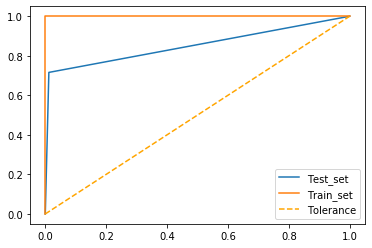

In [37]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=sklearn.metrics.roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr,label='Test_set')
fpr1,tpr1,thresholds1=sklearn.metrics.roc_curve(y_train,y_pred_train)
plt.plot(fpr1,tpr1,label='Train_set')
print(metrics.auc(fpr, tpr))
print(metrics.auc(fpr1, tpr1))
plt.plot([0,1], [0,1], color='orange', linestyle='--',label='Tolerance')
plt.legend(loc="lower right")
plt.show()

In [56]:
x_train['y_pred']=y_pred_train
x_test['y_pred']=y_pred_test

In [57]:
x_train.columns

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'international plan_no',
       'international plan_yes', 'voice mail plan_no', 'voice mail plan_yes',
       'y_pred'],
      dtype='object')

In [58]:
df_new=pd.concat([x_train,x_test])

In [59]:
df_new

number vmail messages  total day minutes  total day calls  \
2515                      0              123.1               88   
1910                      0               69.1              114   
704                       0              221.7               95   
995                       0              190.6              108   
2614                      0              298.4               78   
...                     ...                ...              ...   
2467                      0              161.0               96   
577                       0              149.8              112   
947                      28              174.4               75   
738                       0              159.5              123   
2334                      0               98.8               97   

      total day charge  total eve minutes  total eve calls  total eve charge  \
2515             20.93              213.9               84             18.18   
1910             11.75              230.3              109             19.58   
704              37.69              193.0               82             16.41   
995              32.40              152.3               95             12.95   
2614             50.73              270.5              142             22.99   
...                ...                ...              ...               ...   
2467             27.37              244.9               82             20.82   
577              25.47              180.0               93             15.30   
947              29.65              169.9               80             14.44   
738              27.12              240.8               93             20.47   
2334             16.80              146.9               68             12.49   

      total night minutes  total night calls  total night charge  \
2515                184.9                 88                8.32   
1910                256.7                 96               11.55   
704                 194.1                113                8.73   
995                 144.7                 97                6.51   
2614                107.3                 84                4.83   
...                   ...                ...                 ...   
2467                180.8                103                8.14   
577                 140.0                119                6.30   
947                 201.6                130                9.07   
738                 210.3                 76                9.46   
2334                190.7                105                8.58   

      total intl minutes  total intl calls  total intl charge  \
2515                12.0                 2               3.24   
1910                 6.5                 4               1.76   
704                  6.5                 4               1.76   
995                  7.5                 5               2.03   
2614                12.2                 2               3.29   
...                  ...               ...                ...   
2467                 7.7                 6               2.08   
577                 11.7                 4               3.16   
947                 11.0                 4               2.97   
738                 11.4                 3               3.08   
2334                10.0                 4               2.70   

      customer service calls  international plan_no  international plan_yes  \
2515                       5                      1                       0   
1910                       0                      1                       0   
704                        3                      1                       0   
995                        1                      1                       0   
2614                       0                      0                       1   
...                      ...                    ...                     ...   
2467                       1                      0                       1   
577       

In [60]:
df['Churn_predict_hist']=df_new['y_pred']

In [61]:
df.to_csv('C:/Debasish/personal/DS_city/Decodr_/Dataset/telecom_churn/History_predict.csv',index=False)

In [62]:
pd.crosstab(df['churn'],df['Churn_predict_hist'])

Churn_predict_hist     0    1
churn                        
0                   2561    2
1                     67  369

In [63]:
##Upload test data:

In [64]:
df_test=pd.read_csv('C:/Debasish/personal/DS_city/Decodr_/Dataset/telecom_churn/new_data.csv')

In [65]:
df_test.shape

(334, 17)

In [66]:
df_test.columns

Index(['phone number', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

In [67]:
#Apply Dummy Variable on categorical Inpur Variable: 'international plan', 'voice mail plan',

In [68]:
dummy=pd.get_dummies(df_test[['international plan','voice mail plan']])

In [69]:
dummy.columns

Index(['international plan_no', 'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes'],
      dtype='object')

In [71]:
df_test1=df_test.drop(['total day charge','total eve charge','total night charge','total intl charge','phone number','international plan','voice mail plan'],axis=1)

In [72]:
type(df_test1)

pandas.core.frame.DataFrame

In [73]:
type(dummy)

pandas.core.frame.DataFrame

In [74]:
df_predict1=pd.concat([df_test1,dummy],axis=1)

In [75]:
df_predict=pd.concat([df_test.drop(['total day charge','total eve charge','total night charge','total intl charge','phone number','international plan','voice mail plan'],axis=1),dummy],axis=1)

In [76]:
df_predict.shape

(334, 14)

In [77]:
df_predict.head(2)

number vmail messages  total day minutes  total day calls  \
0                      0              204.0               69   
1                      0              223.2              109   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              225.1              110                240.3                 85   
1              127.5               86                289.3                 83   

   total intl minutes  total intl calls  customer service calls  \
0                 9.6                 5                       1   
1                14.5                 4                       3   

   international plan_no  international plan_yes  voice mail plan_no  \
0                      1                       0                   1   
1                      1                       0                   1   

   voice mail plan_yes  
0                    0  
1                    0

In [78]:
df_predict1.shape

(334, 14)

In [79]:
## Apply model on new Data:

In [80]:
y_pred_Fresh=cat_classifier.predict(df_predict)

In [81]:
print(y_pred_Fresh.reshape(len(y_pred_Fresh),1))

[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [82]:
df_test['Probable_Churn']=y_pred_Fresh

In [83]:
df_test.head(2)

phone number international plan voice mail plan  number vmail messages  \
0     407-8575                 no              no                      0   
1     387-2799                 no              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              204.0               69             34.68              225.1   
1              223.2              109             37.94              127.5   

   total eve calls  total eve charge  total night minutes  total night calls  \
0              110             19.13                240.3                 85   
1               86             10.84                289.3                 83   

   total night charge  total intl minutes  total intl calls  \
0               10.81                 9.6                 5   
1               13.02                14.5                 4   

   total intl charge  customer service calls  Probable_Churn  
0               2.59                       1               0  
1               3.92                       3               0

In [84]:
df_test.to_csv('C:/Debasish/personal/DS_city/Decodr_/Dataset/telecom_churn/New_data_predict.csv',index=False)

Report Prepared by:

**Debasish Goswami**,

**06-Jul-2020**

In [ ]:
##Oversampling:

In [5]:
no_churn=df[df['churn']==0]
churn=df[df['churn']==1]

In [6]:
print(no_churn.shape,churn.shape)

(2563, 18) (436, 18)


In [9]:
from imblearn.combine import SMOTETomek

In [12]:
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)

NameError: name 'x' is not defined

In [13]:
x_res.shape,y_res.shape

NameError: name 'x_res' is not defined